# Practicum 1: EDA & Storytelling with Data
# Analyzing 2019 Airline On-Time Performance from AZ, NV, CA Departures
# Group 13


## **Loading in Data . . .**

In [43]:
#loading in from drive since it's more persistent
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# file path to our csv in shared drive (same for everyone!!)
file_path = '/content/drive/MyDrive/Practicum1Files/2019_ONTIME_REPORTING_FSW-1.csv'

#reading in/showing first 5 rows to make sure it works
df = pd.read_csv(file_path)
print("Dataset loaded in successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of data:")
print(df.head())


Dataset loaded in successfully!
Dataset shape: (1897503, 14)

First 5 rows of data:
      FL_DATE CARRIER_CODE TAIL_NUM  FL_NUM ORIGIN ORIGIN_ST DEST DEST_ST  \
0  2019-10-01           AA   N916NN    2311    TUS        AZ  ORD      IL   
1  2019-10-01           AA   N733UW    2315    PHX        AZ  DEN      CO   
2  2019-10-01           AA   N140AN    2318    DFW        TX  LAX      CA   
3  2019-10-01           AA   N925AN    2325    SNA        CA  DFW      TX   
4  2019-10-01           AA   N143AN    2328    ATL        GA  LAX      CA   

   DEP_TIME  DEP_DELAY  ARR_TIME  ARR_DELAY  ELAPSED_TIME  DISTANCE  
0     828.0        0.0    1353.0        0.0         205.0      1437  
1    1907.0        0.0    2159.0        0.0         112.0       602  
2    1904.0      104.0    2016.0      101.0         192.0      1235  
3    1729.0        4.0    2215.0        3.0         166.0      1205  
4     656.0        0.0     841.0        0.0         285.0      1947  


##**Question 1 - the big question**
What patterns can we find based on the air traffic at certain airports within the California, Arizona, and Nevada region? Which of these airlines are more prone to delays?

## **QUESTION 2**

In [45]:
# --- Q2 Part 1: Data Type Eval & Info---
print("--- DataFrame Info ---")
df.info()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


In [46]:
# --- Q2 Part 2: Preprocessing & Data Cleaning---

# 1. convert FL_DATE to a datetime type
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
print("\n--- After converting FL_DATE to datetime ---")
df.info()

# 2. check unique values for cat. columns like CARRIER_CODE, FL_NUM, ORIGIN_ST, DEST_ST
print("\n--- Unique values check for key categorical columns ---")
print(" !!! # of unique CARRIER_CODEs:", df['CARRIER_CODE'].nunique())
print(" !!! CARRIER_CODEs:\n", df['CARRIER_CODE'].value_counts(dropna=False))
print("\n !!!top 10 unique FL_NUMs:\n", df['FL_NUM'].value_counts(dropna=False).head(10)) # check for thwe FL_NUM type
print("\n !!!unique ORIGIN_STs:", df['ORIGIN_ST'].unique())
print(" !!! uunique DEST_STs:", df['DEST_ST'].unique())

# 3. chjeck num. columns for weird values (negative delays, impossible times)
print("\n--- Stats for numerical columns ---")
print(df[['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'DISTANCE']].describe())



--- After converting FL_DATE to datetime ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   CARRIER_CODE  object        
 2   TAIL_NUM      object        
 3   FL_NUM        int64         
 4   ORIGIN        object        
 5   ORIGIN_ST     object        
 6   DEST          object        
 7   DEST_ST       object        
 8   DEP_TIME      float64       
 9   DEP_DELAY     float64       
 10  ARR_TIME      float64       
 11  ARR_DELAY     float64       
 12  ELAPSED_TIME  float64       
 13  DISTANCE      int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 202.7+ MB

--- Unique values check for key categorical columns ---
 !!! # of unique CARRIER_CODEs: 15
 !!! CARRIER_CODEs:
 CARRIER_CODE
WN    556915
AA    286235
OO    239463
UA    235935
DL    187842
AS    149495
B6     572

In [47]:
# --- Q2 Part 2: Filter for Our States ---

# ONLY states we want in our dataset
states_of_interest = ['AZ', 'NV', 'CA']

# filter DF to include only flights from AZ NV CA
initial_rows = df.shape[0]
df = df[df['ORIGIN_ST'].isin(states_of_interest)].copy() # .copy() to avoid SettingWithCopyWarning
filtered_rows = df.shape[0]

print(f"\n--- After filtering for ORIGIN_ST in {states_of_interest} ---")
print(f" !!! Original number of rows: {initial_rows}")
print(f" !!! Number of rows after filtering: {filtered_rows}")
print(f" !!! Number of rows removed: {initial_rows - filtered_rows}")
print("\n !!! Verify ORIGIN_ST unique values:")
print(df['ORIGIN_ST'].unique())

# re-run df.info() and check for missing values again to see how filtering affected them
print("\n--- DataFrame Info after filtering ---")
df.info()

print("\n--- Missing Values after filtering ---")
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))




--- After filtering for ORIGIN_ST in ['AZ', 'NV', 'CA'] ---
 !!! Original number of rows: 1897503
 !!! Number of rows after filtering: 1204574
 !!! Number of rows removed: 692929

 !!! Verify ORIGIN_ST unique values:
['AZ' 'CA' 'NV']

--- DataFrame Info after filtering ---
<class 'pandas.core.frame.DataFrame'>
Index: 1204574 entries, 0 to 1897501
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   FL_DATE       1204574 non-null  datetime64[ns]
 1   CARRIER_CODE  1204574 non-null  object        
 2   TAIL_NUM      1201763 non-null  object        
 3   FL_NUM        1204574 non-null  int64         
 4   ORIGIN        1204574 non-null  object        
 5   ORIGIN_ST     1204574 non-null  object        
 6   DEST          1204574 non-null  object        
 7   DEST_ST       1204574 non-null  object        
 8   DEP_TIME      1185750 non-null  float64       
 9   DEP_DELAY     1185746 non-null  float64 

In [48]:
# --- Q2 Part 2: Handling Missing Values and Adjusting Types---

print("\n--- Before handling missing values ---")
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))
initial_rows_after_filter = df.shape[0]

# find columns for delay analysis where we'll drop NaNs
critical_delay_columns = ['ARR_DELAY', 'ELAPSED_TIME', 'DEP_DELAY', 'DEP_TIME', 'ARR_TIME']
df.dropna(subset=critical_delay_columns, inplace=True)

print(f"\n--- After dropping rows with NaNs in critical delay columns ({', '.join(critical_delay_columns)}) ---")
print(f" !!! Number of rows before dropping NaNs: {initial_rows_after_filter}")
print(f" !!! Number of rows after dropping NaNs: {df.shape[0]}")
print(f" !!! Rows deleted bc of missing critical delay data: {initial_rows_after_filter - df.shape[0]}")

# re-check missing values
print("\n--- Missing Values Overview after dropping NaNs ---")
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))

# extra check: convert  the time/delay columns to integers ( ONLY if all values are whole numbers)
# usually delays are reported in whole minutes.
# aslo check for floats after dropping NaNs
for col in ['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME']:
    # check for non int vals
    if not (df[col] % 1 == 0).all():
        print(f" !!! Column '{col}' has non-int float values. lets keep as float64.")
    else:
        # safe to convert to ints now that NaNs are handled.
        df[col] = df[col].astype(int)
        print(f"Column '{col}' converted to int64.")

print("\n--- Final DataFrame Info after handling missing values and adjusting types ---")
df.info()



--- Before handling missing values ---
ARR_DELAY       22095
ELAPSED_TIME    22095
ARR_TIME        19755
DEP_DELAY       18828
DEP_TIME        18824
TAIL_NUM         2811
dtype: int64

--- After dropping rows with NaNs in critical delay columns (ARR_DELAY, ELAPSED_TIME, DEP_DELAY, DEP_TIME, ARR_TIME) ---
 !!! Number of rows before dropping NaNs: 1204574
 !!! Number of rows after dropping NaNs: 1182479
 !!! Rows deleted bc of missing critical delay data: 22095

--- Missing Values Overview after dropping NaNs ---
Series([], dtype: int64)
Column 'DEP_TIME' converted to int64.
Column 'DEP_DELAY' converted to int64.
Column 'ARR_TIME' converted to int64.
Column 'ARR_DELAY' converted to int64.
Column 'ELAPSED_TIME' converted to int64.

--- Final DataFrame Info after handling missing values and adjusting types ---
<class 'pandas.core.frame.DataFrame'>
Index: 1182479 entries, 0 to 1897501
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --

## Question 2 Part 2: Justify The Approach

Question 2 asked us to get this data ready for analysis. Here's how we cleaned things up:

**1. Data Types:**
*   **FL_DATE:** This started as a bunch of text, so we turned it into an actual date format datetime. Which is important for anything time-related later on.
*   **Time/Delay Fields:** Columns like DEP_TIME, DEP_DELAY, etc., were float types because of missing values. Once we got rid of the missing data (explained next), we converted them to int (whole numbers). This makes more sense since things like "delay" are usually reported in whole minutes.

**2. Filtering the Data:**
*   The problem statement was super clear: we only care about flights leaving from **AZ, NV, or CA**. But it turns out that the original dataset had a bunch of other states. So, we filtered it down to just those three origins, which got rid of about 690,000 extra rows.

**3. Handling Missing/Bad Data:**
*   We found a bunch of missing values, especially in the departure/arrival time and delay columns (like DEP_TIME, ARR_DELAY, etc.). When a flight is missing this kind of info, it usually means it was canceled, diverted, or just didn't have full data.
*   Instead of trying to guess/fill in these gaps (which could mess up our delay calculations), we decided to just drop any rows where this critical flight data was missing. This trimmed about 22,095 more rows but makes sure that every single flight we're analyzing has complete and usable data. Even the TAIL_NUM missing values went away in this.


In [49]:
# --- Q2 Part 3: High-Level Overview and Summary Stats ---

print("--- Overview of Cleaned Dataset ---")
print(f"The cleaned dataset contains {df.shape[0]:,} records and {df.shape[1]} columns.")
print(f"The data goes from {df['FL_DATE'].min().strftime('%Y-%m-%d')} to {df['FL_DATE'].max().strftime('%Y-%m-%d')}.")
print(f"Flights originate from: {df['ORIGIN_ST'].unique().tolist()}")
print(f"Number of unique carriers: {df['CARRIER_CODE'].nunique()}")
print(f"Number of unique originating airports: {df['ORIGIN'].nunique()}")
print(f"Number of unique destination airports: {df['DEST'].nunique()}")

print("\n--- Descriptive Stats for Numerical Columns (the Cleaned Data) ---")
print(df.describe())

print("\n--- Value Counts for Categorical Columns ---")
print("\nCARRIER_CODE Value Counts:")
print(df['CARRIER_CODE'].value_counts())
print("\nORIGIN_ST Value Counts:")
print(df['ORIGIN_ST'].value_counts())
print("\nDEST_ST Value Counts (Top 10):")
print(df['DEST_ST'].value_counts().head(10))


--- Overview of Cleaned Dataset ---
The cleaned dataset contains 1,182,479 records and 14 columns.
The data goes from 2019-01-01 to 2019-12-31.
Flights originate from: ['AZ', 'CA', 'NV']
Number of unique carriers: 15
Number of unique originating airports: 31
Number of unique destination airports: 151

--- Descriptive Stats for Numerical Columns (the Cleaned Data) ---
                             FL_DATE        FL_NUM      DEP_TIME  \
count                        1182479  1.182479e+06  1.182479e+06   
mean   2019-07-03 16:04:41.282965504  2.174398e+03  1.324289e+03   
min              2019-01-01 00:00:00  1.000000e+00  1.000000e+00   
25%              2019-04-05 00:00:00  7.580000e+02  9.070000e+02   
50%              2019-07-05 00:00:00  1.746000e+03  1.306000e+03   
75%              2019-10-02 00:00:00  2.996000e+03  1.743000e+03   
max              2019-12-31 00:00:00  7.910000e+03  2.400000e+03   
std                              NaN  1.741500e+03  5.262958e+02   

          DEP_DEL

<Figure size 1000x600 with 0 Axes>

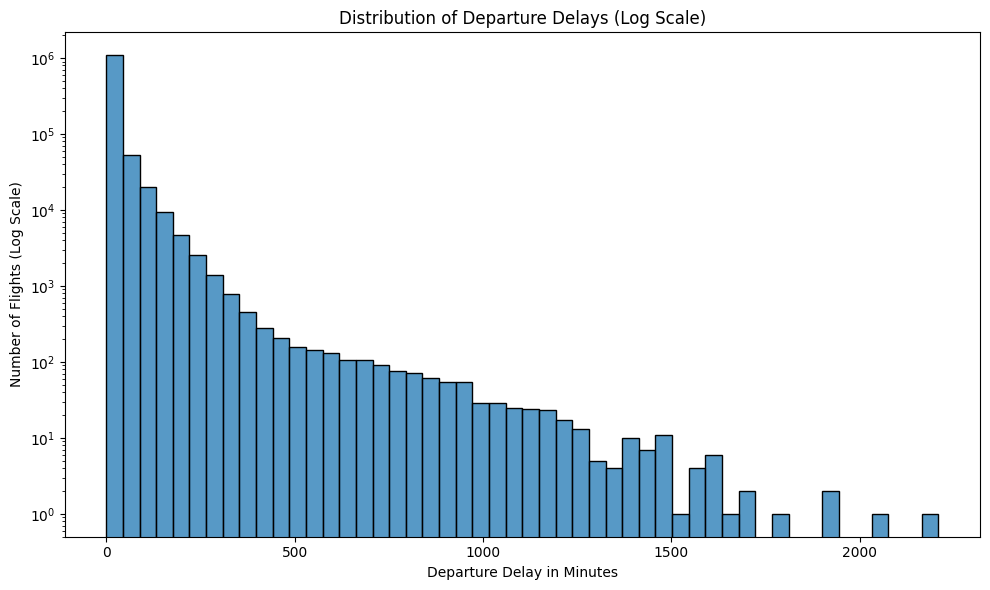

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Q2 Part 3: Visualizations ---

# Visualization 1: Distribution of Departure Delays

plt.figure(figsize=(10, 6))

# full range to understand the extreme values
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=50, log=True, kde=False) # using the log scale for y to make it fit
plt.title('Distribution of Departure Delays (Log Scale)')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Number of Flights (Log Scale)')
plt.tight_layout()
plt.show()

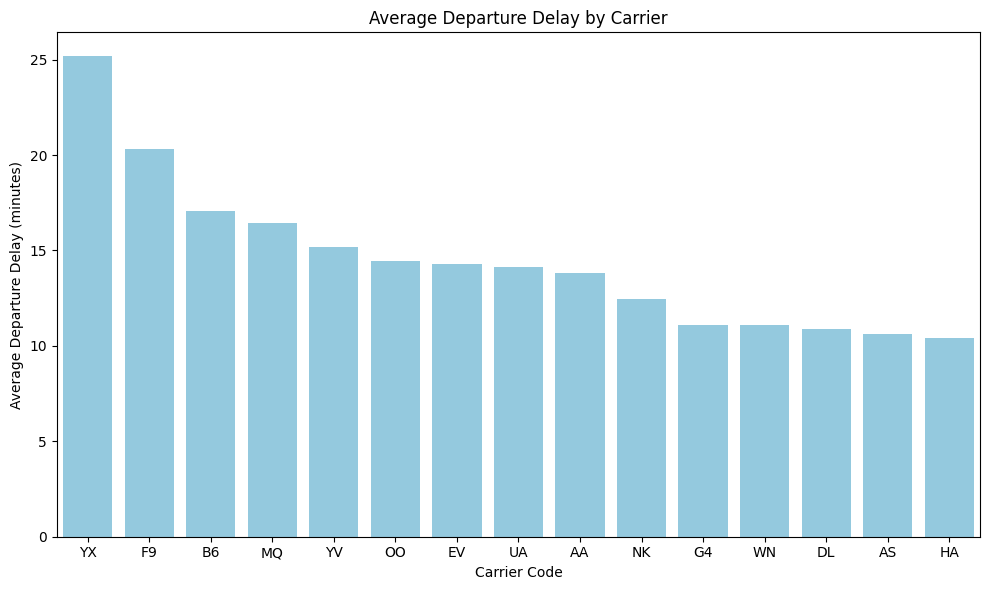


--- Average Departure Delays by Carrier (sorted) ---
CARRIER_CODE
YX    25.168831
F9    20.322845
B6    17.042824
MQ    16.413364
YV    15.195013
OO    14.436494
EV    14.276596
UA    14.153770
AA    13.838426
NK    12.477871
G4    11.102706
WN    11.099995
DL    10.892013
AS    10.602252
HA    10.422690
Name: DEP_DELAY, dtype: float64


In [51]:
# --- Q2 Part 3: Visualization) ---

# Visualization 2: Avg Departure Delay by Carrier

# get the avg departure delay for each carrier
avg_dep_delay_by_carrier = df.groupby('CARRIER_CODE')['DEP_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_dep_delay_by_carrier.index, y=avg_dep_delay_by_carrier.values, color='skyblue')
plt.title('Average Departure Delay by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Average Departure Delay (minutes)')
plt.tight_layout()
plt.show()

print("\n--- Average Departure Delays by Carrier (sorted) ---")
print(avg_dep_delay_by_carrier)


The carrier codes for each arlines can be seen here: [Carrier Codes](https://www.bts.gov/topics/airlines-and-airports/airline-codes)

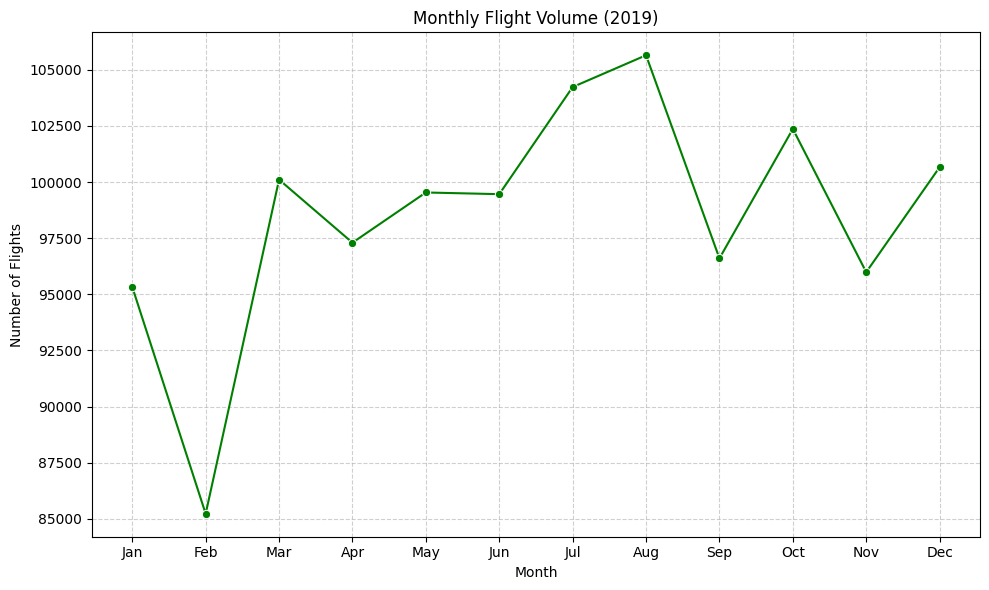


--- Monthly Flight Counts ---
MONTH
1      95329
2      85226
3     100110
4      97302
5      99538
6      99463
7     104234
8     105650
9      96604
10    102368
11     95989
12    100666
Name: count, dtype: int64


In [52]:
# --- Q2 Part 6: Visualizations ---

# Visualization 3: Monthly Flight Volume

# get the month from FL_DATE
df['MONTH'] = df['FL_DATE'].dt.month

# find the flight counts per month
monthly_flight_counts = df['MONTH'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_flight_counts.index, y=monthly_flight_counts.values, marker='o', color='green')
plt.title('Monthly Flight Volume (2019)')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid
plt.tight_layout()
plt.show()

print("\n--- Monthly Flight Counts ---")
print(monthly_flight_counts)


### **-------------------!!! END OF QUESTION 2 !!!-------------------** ###

##Question 3

###3.1
Question: In the region of Arizona (AZ), Nevada (NV), and California (CA), which state has the most air traffic?

What defines "most air traffic" + justification: For our purposes, we are going to define the "most air traffic" as the number of outbound and inbound flights for the state added together. Using the outbound + inbound flights makes the most sense, as it takes into account the number of flights leaving and arriving the state rather than looking at flight hours, as that isn't always necessarily going to within the state. For instance, a flight might take 5 hours, but only 1 of those 5 hours might be spent in the desired state with the other 4 hours flying outside of the state. On the other hand, another 2 flights might only take 2 hours, with both of those two hours within the state. In other words, flight hours is not an accurate depiction of how much air traffic is in the state and it makes more sense to take number of outbound and inbound flights into account.

Arizona:  276806
Nevada:  253766
California:  1151763


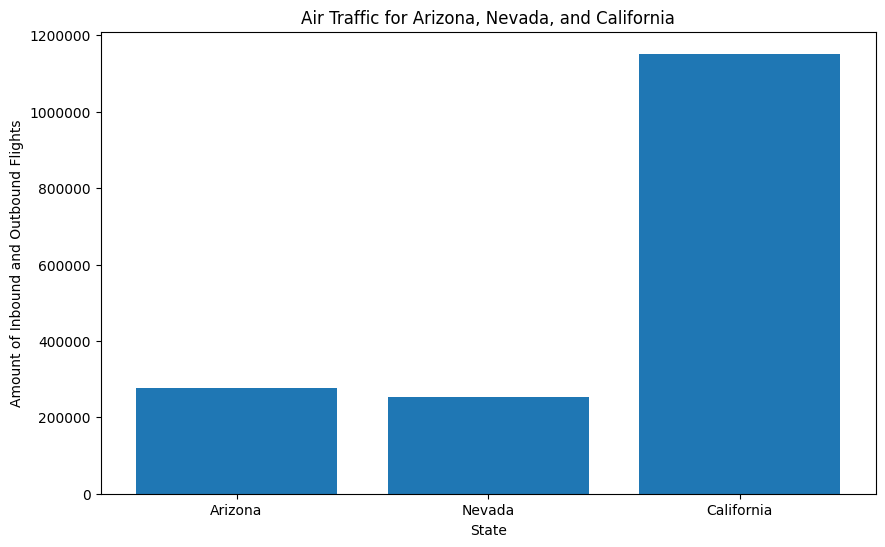

In [53]:
#Arizona
#Find number of outbound and inbound flights added together
arizona_airtraffic = df[df['ORIGIN_ST'] == 'AZ'].shape[0] + df[df['DEST_ST'] == 'AZ'].shape[0]
print("Arizona: ", arizona_airtraffic)

#Nevada
#Find number of outbound and inbound flights added together
nevada_airtraffic = df[df['ORIGIN_ST'] == 'NV'].shape[0] + df[df['DEST_ST'] == 'NV'].shape[0]
print("Nevada: ", nevada_airtraffic)

#California
#Find number of outbound and inbound flights added together
california_airtraffic = df[df['ORIGIN_ST'] == 'CA'].shape[0] + df[df['DEST_ST'] == 'CA'].shape[0]
print("California: ", california_airtraffic)

#Print graph
plt.figure(figsize=(10,6))
plt.bar(['Arizona', 'Nevada', 'California'], [arizona_airtraffic, nevada_airtraffic, california_airtraffic])
plt.title('Air Traffic for Arizona, Nevada, and California')
plt.xlabel('State')
plt.ylabel('Amount of Inbound and Outbound Flights')
plt.ticklabel_format(style='plain', axis='y')

As seen from the bar graph, California has the most amount of air traffic by far compared to most other states. Using the population information from [Iowa State University](https://www.icip.iastate.edu/tables/population/states-estimates) could shed a light onto why this is. According to the 2020 census from this site, California had a whopping population of 39,437,610 people, while Arizona and Nevada had 7,291,843 and 1,932,571 people respectively (the difference between the populations of Arizona and Nevada being closer can also help to explain why their air traffic is a lot closer). Additionally, using outside knowledge, California is known to be a popular tourist destination with attractions such as Hollywood and the Santa Monica Pier, which could also be a huge contributing factor to the crazy high amounts of air traffic compared to the other two states.

##3.2
Question: For each state in the region, what are the top five most popular outbound locations? To put it plainly:

1. What is the top five most popular outbound locations for Arizona?
2. What is the top five most popular outbound locations for Nevada?
3. What is the top five most popular outbound locations for California?

DEST
DEN    10197
LAX     9585
DFW     7692
SEA     6836
LAS     6730
dtype: int64


Text(0, 0.5, 'Number of Flights')

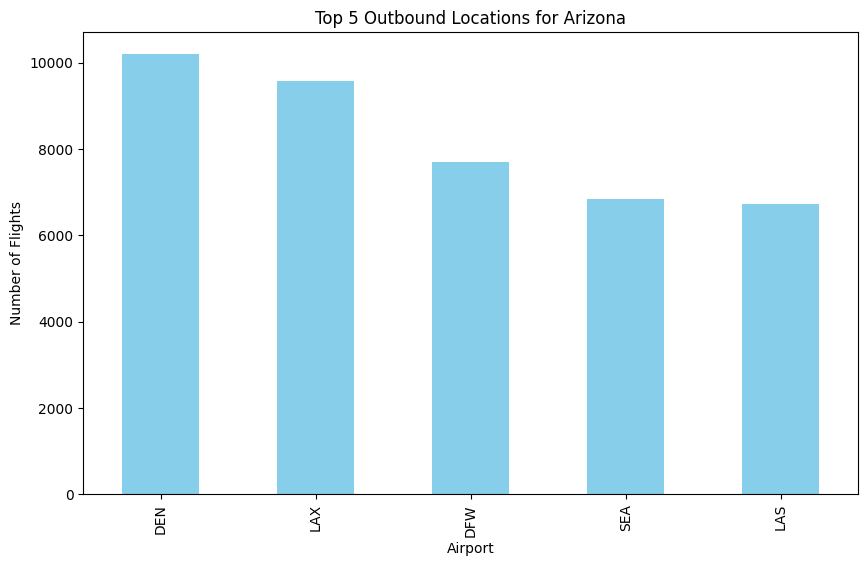

In [54]:
#Arizona
arizona_outbound = df[df['ORIGIN_ST'] == 'AZ'].groupby('DEST').size().sort_values(ascending=False).head(5)
print(arizona_outbound)

#Print graph
plt.figure(figsize=(10,6))
arizona_outbound.plot(kind='bar', color='skyblue')
plt.title('Top 5 Outbound Locations for Arizona')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')

DEST
LAX    13834
SFO     9233
DEN     8605
PHX     7755
SEA     7164
dtype: int64


Text(0, 0.5, 'Number of Flights')

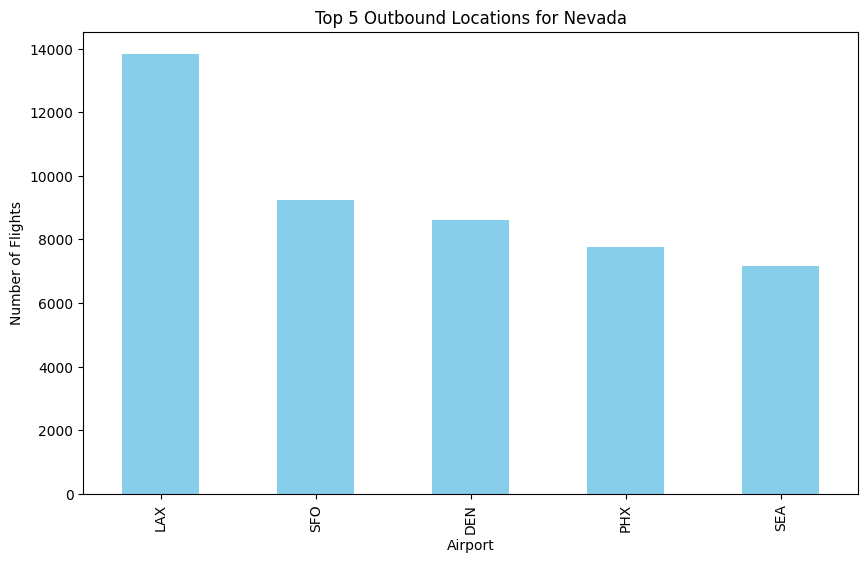

In [55]:
#Nevada
nevada_outbound = df[df['ORIGIN_ST'] == 'NV'].groupby('DEST').size().sort_values(ascending=False).head(5)
print(nevada_outbound)

#Print graph
plt.figure(figsize=(10,6))
nevada_outbound.plot(kind='bar', color='skyblue')
plt.title('Top 5 Outbound Locations for Nevada')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')

DEST
PHX    48997
LAS    48239
SFO    43958
SEA    43233
LAX    40025
dtype: int64


Text(0, 0.5, 'Number of Flights')

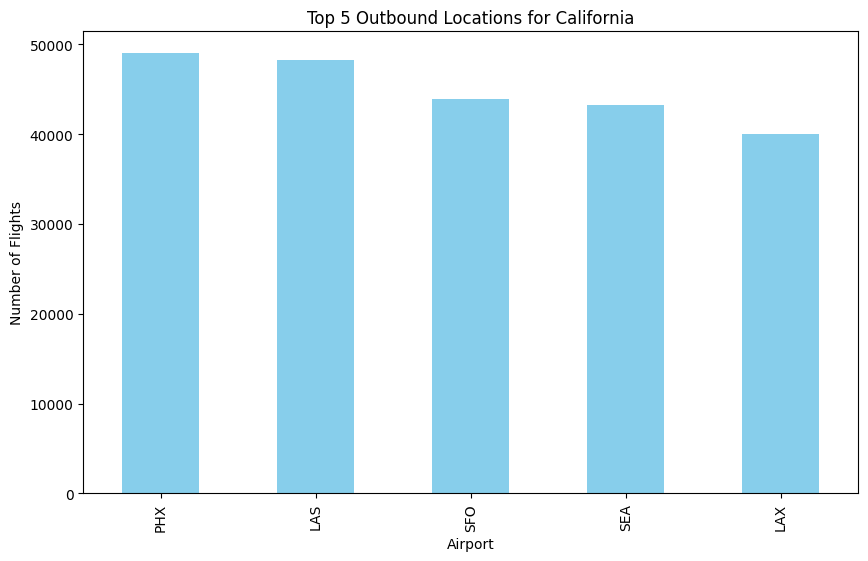

In [56]:
#California
california_outbound = df[df['ORIGIN_ST'] == 'CA'].groupby('DEST').size().sort_values(ascending=False).head(5)
print(california_outbound)

#Print graph
plt.figure(figsize=(10,6))
california_outbound.plot(kind='bar', color='skyblue')
plt.title('Top 5 Outbound Locations for California')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')

Looking at the top 5 outbound locations for each of these states, we can see that many of the same airlines are some of the most popular outbound locations. LAX, PHX, and SEA are all among the top 5 outbound locations for each state within the region. This is probably because of how location-wise, these three states are all within the same region, meaning many of their flights could be going to similar places. Furthermore, it can be seen that the top flights from AZ, NV, and CA are mostly also outbounding to AZ, NV, and CA. For instance, within the top outbound locations for Arizona, LAX and LAS are located in California and Nevada, respectively. This pattern is similarly in the other two states as well with top outbound airports containing the other two states. This pattern is most likely because of how location-wise the three states are quite close to one another, allowing for multiple flights to and from each state each day.

##3.3
Question: What are the top ten results for the proportion of flights from each airline/operator for each state? To put it plainly:

1. What are the top ten results for the proportion of flights from each airline/operator for Arizona?
2. What are the top ten results for the proportion of flights from each airline/operator for Nevada?
3. What are the top ten results for the proportion of flights from each airline/operator for California?

CARRIER_CODE
WN    0.32
AA    0.30
OO    0.12
YV    0.11
DL    0.05
UA    0.04
G4    0.03
AS    0.02
B6    0.01
F9    0.01
dtype: float64


Text(0, 0.5, 'Proportion of Flights per Airline')

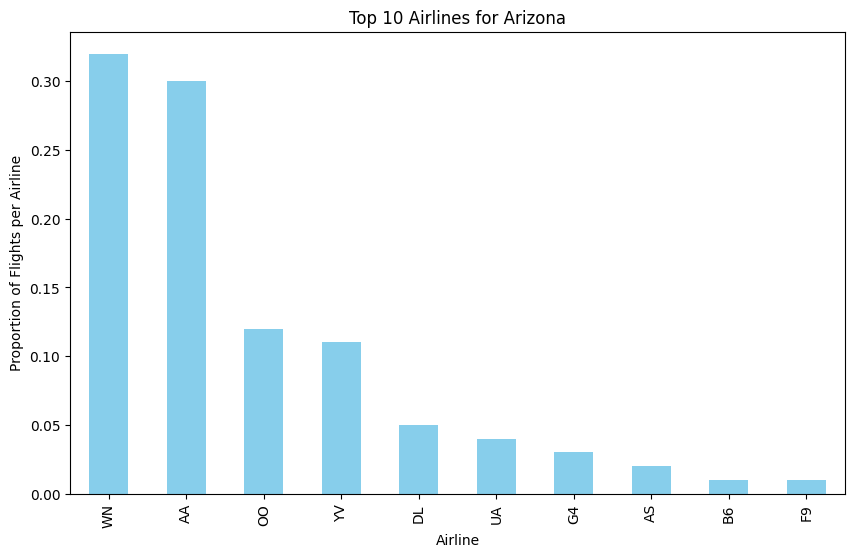

In [57]:
#Arizona
arizona_proportion = df[df['ORIGIN_ST'] == 'AZ'].groupby('CARRIER_CODE').size()/df[df['ORIGIN_ST'] == 'AZ'].shape[0]
arizona_proportion = arizona_proportion.round(2)
#Print out the top ten results
print(arizona_proportion.sort_values(ascending=False).head(10))

#Print graph
plt.figure(figsize=(10,6))
arizona_proportion.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Airlines for Arizona')
plt.xlabel('Airline')
plt.ylabel('Proportion of Flights per Airline')

CARRIER_CODE
WN    0.43
NK    0.10
AA    0.09
DL    0.08
UA    0.08
F9    0.05
G4    0.05
AS    0.04
OO    0.04
B6    0.03
dtype: float64


Text(0, 0.5, 'Proportion of Flights per Airline')

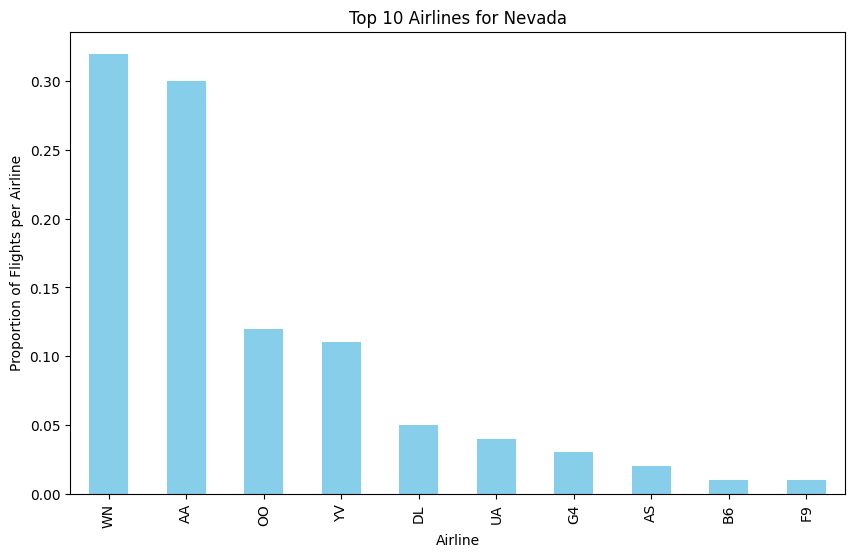

In [58]:
#Nevada
nevada_proportion = df[df['ORIGIN_ST'] == 'NV'].groupby('CARRIER_CODE').size()/df[df['ORIGIN_ST'] == 'NV'].shape[0]
nevada_proportion = nevada_proportion.round(2)
#Print out the top ten results
print(nevada_proportion.sort_values(ascending=False).head(10))

#Print graph
plt.figure(figsize=(10,6))
arizona_proportion.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Airlines for Nevada')
plt.xlabel('Airline')
plt.ylabel('Proportion of Flights per Airline')

CARRIER_CODE
WN    0.31
OO    0.17
UA    0.14
AA    0.11
AS    0.09
DL    0.09
B6    0.03
NK    0.02
YV    0.01
F9    0.01
dtype: float64


Text(0, 0.5, 'Proportion of Flights per Airline')

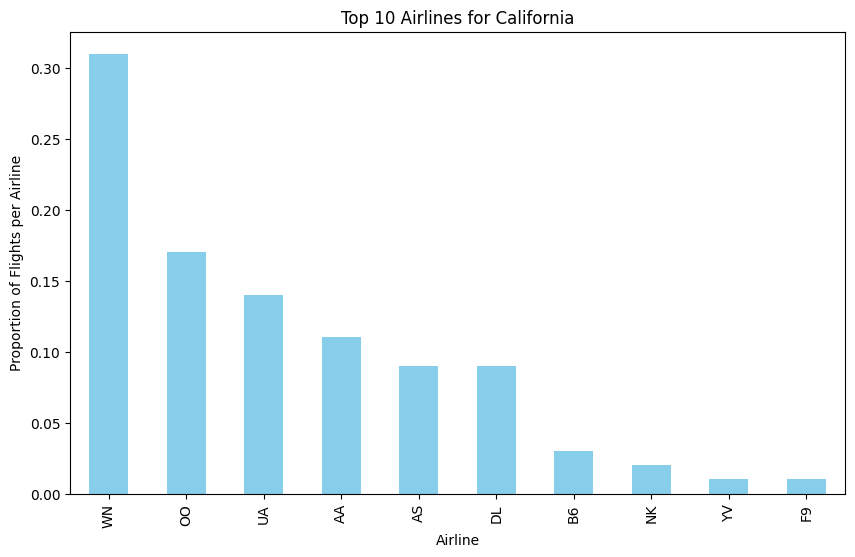

In [59]:
#California
california_proportion = df[df['ORIGIN_ST'] == 'CA'].groupby('CARRIER_CODE').size()/df[df['ORIGIN_ST'] == 'CA'].shape[0]
california_proportion = california_proportion.round(2)
#Print out the top ten results
print(california_proportion.sort_values(ascending=False).head(10))

#Print graph
plt.figure(figsize=(10,6))
california_proportion.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Airlines for California')
plt.xlabel('Airline')
plt.ylabel('Proportion of Flights per Airline')

From the above bar graphs, the porportions of the number of flights that each airline has in each state. Southwest Airlines Co. (WN) seems to be the most popular airline proportionally within each state, with with more than 30% of flights in each state being rom Southwest Airlines Co. Other than that, there seems to be many of the same airlines that are the most popular proportionally across the three states. For instance, both OO and AA appear in all three of the state's most popular airlines proportionally. This pattern could be possibly because that location-wise these airlines are just the most popular. For instance, if we were looking at most popular flight proportionally in NJ, maybe the the top airline wouldn't be Southwest Airlines Co., but an airline called Northeast Airlines Co (this isn't a real airline, but more of a possibility of something similar). All in all, from the graphs above, many of the most popular airlines seem to be the same throughout the three states and it could possibly be due to their location and how these three states are pretty much part of the same region.

The carrier codes for each arlines can be seen here: [Carrier Codes](https://www.bts.gov/topics/airlines-and-airports/airline-codes)

# Question 4

## 4.1

The question 4.1 is asking us to explore the CSV dataset file. Within it there is a plethora of data given! Let's find certain patterns about the carriers. One of the largest concepts we are looking for in this assignment is the delays. Do certain carriers have more delays? What about it's "territories"? Let's dive deeper!

## First Pattern

Let's see whether distance might affect certain airlines. However what might be a short distance you might ask? After sorting them into custom bins for distance, cutting them to find the ranges - I could deduce that under 500 miles and extremely short distance compared to the rest of the dataset that had flights up to 3000 miles!

What we want to do is create a short distance variable, find the total amount of delay from the carrier - and then find out how many delays are for the different kinds of trips!

In [60]:
# Checking if specific carrier do worse in short flights

# Initalize a short flight (True if miles < 500)
df['SHORT'] = df['DISTANCE'] < 500

# Find total delay from sum of ARR + DEP
df['TOTAL_DELAY'] = df['ARR_DELAY'] + df['DEP_DELAY']

# Group the carrier code and calculate delay and find avg.
short_travel = df.groupby(['CARRIER_CODE', 'SHORT'])['TOTAL_DELAY'].mean().round(2).reset_index()


## Visualizing first Pattern

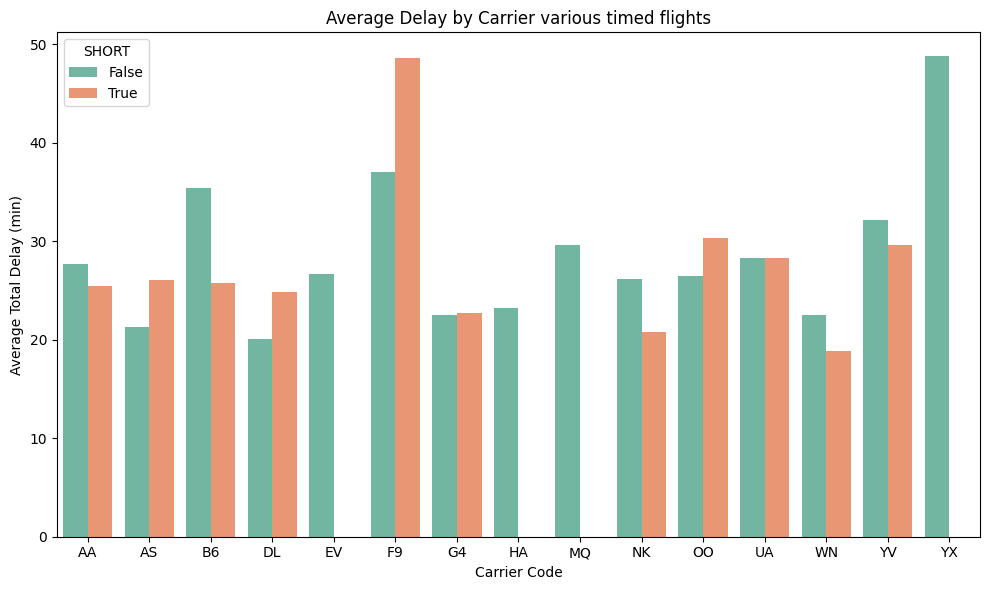

In [61]:
# Compare carrier's avg. delay for different types of flights
plt.figure(figsize=(10, 6))

# if the trip is long, return "short" as False
sns.barplot(data=short_travel, x='CARRIER_CODE', y='TOTAL_DELAY', hue='SHORT', palette='Set2')

# Customizing the bar chart
plt.title('Average Delay by Carrier various timed flights')
plt.xlabel('Carrier Code')
plt.ylabel('Average Total Delay (min)')
plt.tight_layout()
plt.show()


## Understanding Pattern 1:

From the pattern we can see that there are some large variations and even key points we can take away from this data. F9 and OO seem to be doing better with shorter flights, however everyone else has more delays with longer flights!

And even cooler detail to note that some airlines such as YX and HA only take long distance flights! They present no flights that were taken under 500 miles.

## Pattern 2:

Now that we have seen how certain carrier act during different milage on flights - what about the certain "territories" that the assignment was mentioning about?

Are certain carriers progressively worse in certain states? Let's figure that out!


To tackle this issue we grouped the carriers and the states and compared this to the average delay time that we have already computed before. After that - comparing them to certain states. Luckily this assignment lists them out which are the most important so we will be choose Arizona, Nevada, and California!

In [62]:
# Are some carriers more delayed in some states?

# Grouping carriers and states to find avg. total delay and rename columns
statewise_pattern = df.groupby(['CARRIER_CODE', 'ORIGIN_ST'])['TOTAL_DELAY'].mean().round(2).reset_index()

# Target the 3 states from the deliverables from the assignment
region_subset = statewise_pattern[statewise_pattern['ORIGIN_ST'].isin(['AZ', 'NV', 'CA'])]



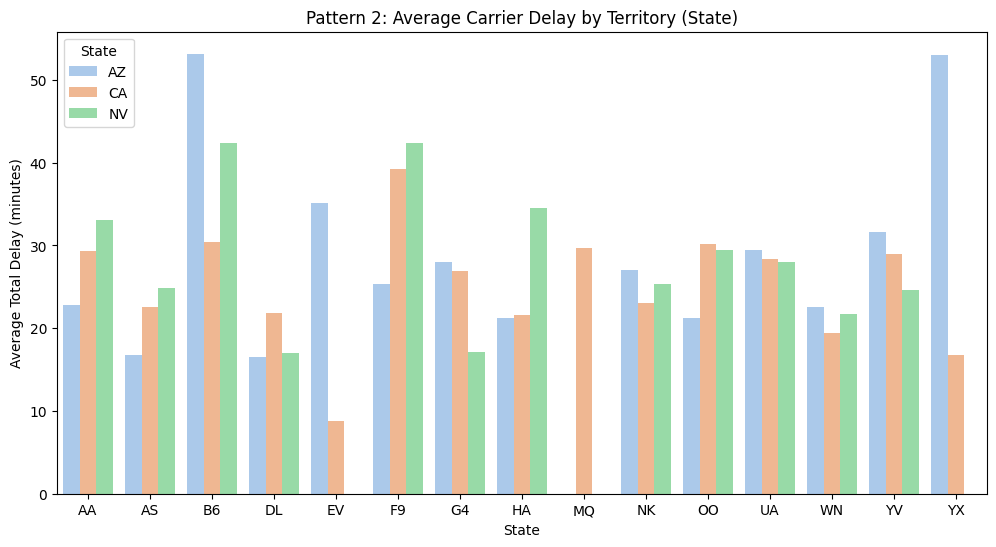

In [63]:
# Comparing  carrier's avg. delay across AZ, NV, and CA

# Creating the bar plot chart
plt.figure(figsize=(12, 6))

# Using a certain palette to differentiate the states and show the rgion vs state
sns.barplot(data=region_subset, x='CARRIER_CODE', y='TOTAL_DELAY', hue='ORIGIN_ST', palette='pastel')

plt.title('Pattern 2: Average Carrier Delay by Territory (State)')
plt.xlabel('State')
plt.ylabel('Average Total Delay (minutes)')
plt.legend(title='State')
plt.show()


## Understanding Pattern two:

With this certain Dataset we can see multiple things here. First of all, some carriers such as EV, MQ, and YX do not seem to fly in all states!

Another thing to note - which is what we were originally for - was Arizona by far seems to have the most delays! B6 and YX seem to have a lot of trouble with this specific region, and CA seems to have the least amount of issues when it comes on average to the regions!

## 4.2
Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate:

    1) which carriers are more prone to flight delays and
  
    2) are the delays occurring more frequently in certain regions**?

Note: Finding the minimum was not possible! Since we have cleared the datasets of 0's - what is most likely happening is that this is not possible to calculate since we have an empty graph! To prevent confusion, we decided not to put in the minimum calculated delays and only added the average and maximum for the arrival and depature!



## Sorting Delays by Carrier

In [64]:
# Group by carrier - calculate min, max, and mean. Calculating for both ARR and DEP flights
carrier_delays = df.groupby('CARRIER_CODE')[['ARR_DELAY', 'DEP_DELAY']].agg(['min', 'max', 'mean']).round(2)

# Renaming columns - easier to read
carrier_delays.columns = ['ARR_MIN', 'ARR_MAX', 'ARR_MEAN', 'DEP_MIN', 'DEP_MAX', 'DEP_MEAN']

# Turn the carrier codes to a regular column to plot them later
carrier_delays = carrier_delays.reset_index()

# Creating new column - sum of ARR and DEP delays
carrier_delays['TOTAL_AVG_DELAY'] = carrier_delays['ARR_MEAN'] + carrier_delays['DEP_MEAN']

# Sorting most delayed carriers and keeping top 10 for visualization
top10 = carrier_delays.sort_values('TOTAL_AVG_DELAY', ascending=False).head(10)


This part of the analysis really helped us identiy which airlines had the worst performance for the delays. Looking up one flight at a time is very unefficent so grouping all carriers and calculting the neccessary data gives us a clear understanding on the carriers delay time

We created a new column which also showed the total delay average time and use that to find the 10 most delayed planes.

## Bar plot of average delays

<ipython-input-65-57959b6990df>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CARRIER_CODE', y='ARR_MEAN', data=top10.sort_values('ARR_MEAN', ascending=False), palette='pastel')


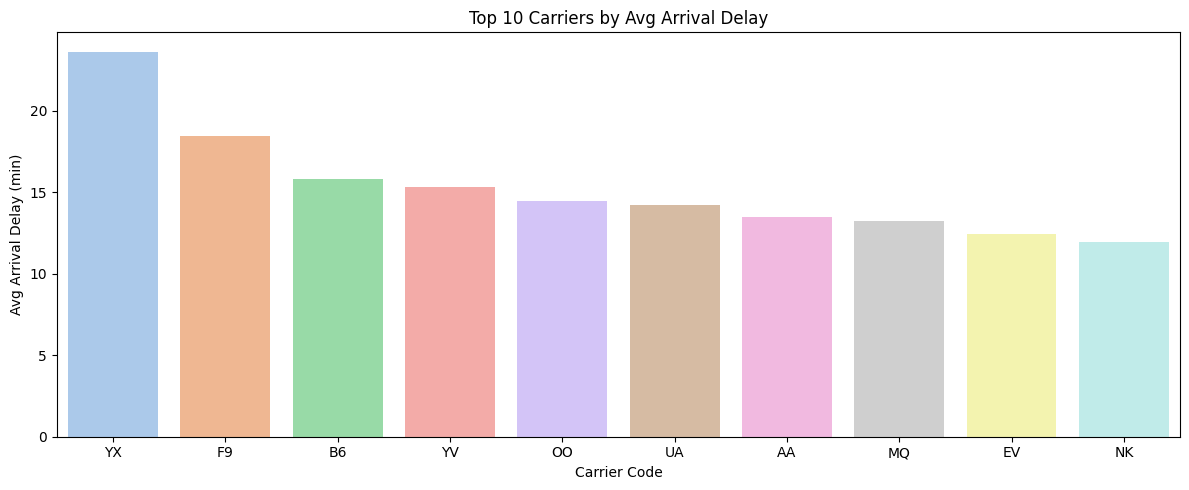

In [65]:
# Creating the bar graph
plt.figure(figsize=(12, 5))

# Plotting bar chart from decending order
sns.barplot(x='CARRIER_CODE', y='ARR_MEAN', data=top10.sort_values('ARR_MEAN', ascending=False), palette='pastel')

# Customizing graph
plt.title('Top 10 Carriers by Avg Arrival Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Avg Arrival Delay (min)')
plt.tight_layout()
plt.show()


## Max Arrival Delays

<ipython-input-66-3589683f7f85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CARRIER_CODE', y='ARR_MAX', data=top10.sort_values('ARR_MAX', ascending=False), palette='pastel')


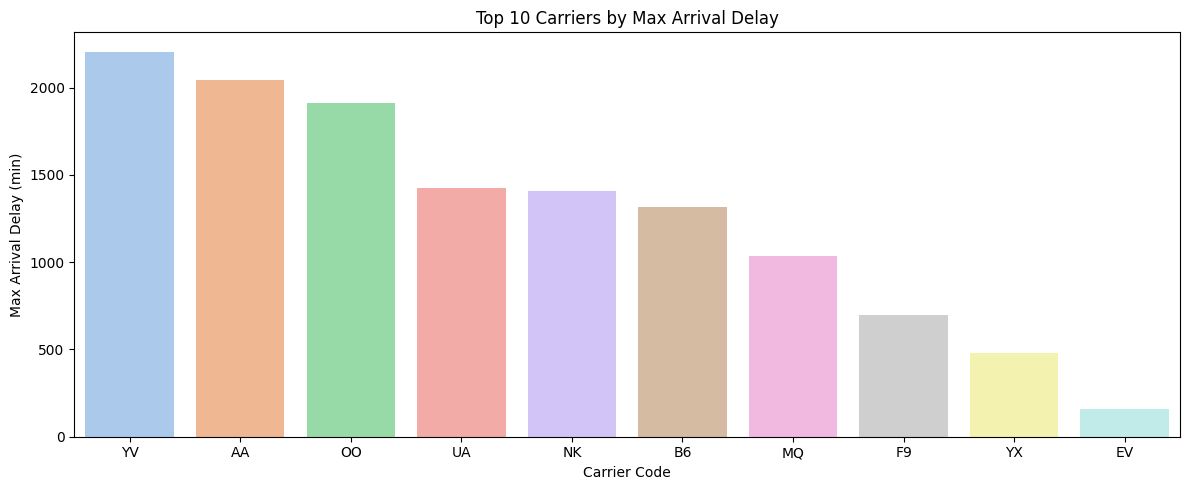

In [66]:
# Creating bar graph
plt.figure(figsize=(12, 5))

# Plotting graph in decending order
sns.barplot(x='CARRIER_CODE', y='ARR_MAX', data=top10.sort_values('ARR_MAX', ascending=False), palette='pastel')

# Customizing the graph
plt.title('Top 10 Carriers by Max Arrival Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Max Arrival Delay (min)')
plt.tight_layout()
plt.show()


This shows complexlty different numbers! Instead of YX, F9, and B6 - we see YV AA and OO having the worst delays of all time with them having at least 1700 minutes of delay!

If you're wondering that's 283 hours, or 11 days. Ouch.

## Depature Delay

<ipython-input-67-88148d43d788>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CARRIER_CODE', y='DEP_MEAN', data=top10.sort_values('DEP_MEAN', ascending=False), palette='coolwarm')


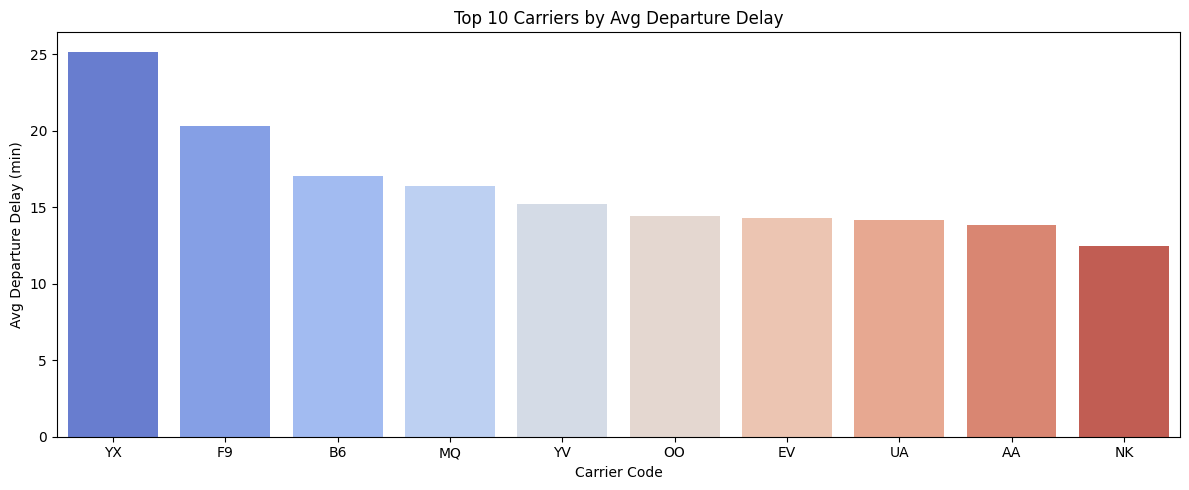

In [67]:
# Creating departure delay graph
plt.figure(figsize=(12, 5))

# Plot them in decending order
sns.barplot(x='CARRIER_CODE', y='DEP_MEAN', data=top10.sort_values('DEP_MEAN', ascending=False), palette='coolwarm')

# Cusomize the graph
plt.title('Top 10 Carriers by Avg Departure Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Avg Departure Delay (min)')
plt.tight_layout()
plt.show()


## Max Departure Delays

<ipython-input-68-88148d43d788>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CARRIER_CODE', y='DEP_MEAN', data=top10.sort_values('DEP_MEAN', ascending=False), palette='coolwarm')


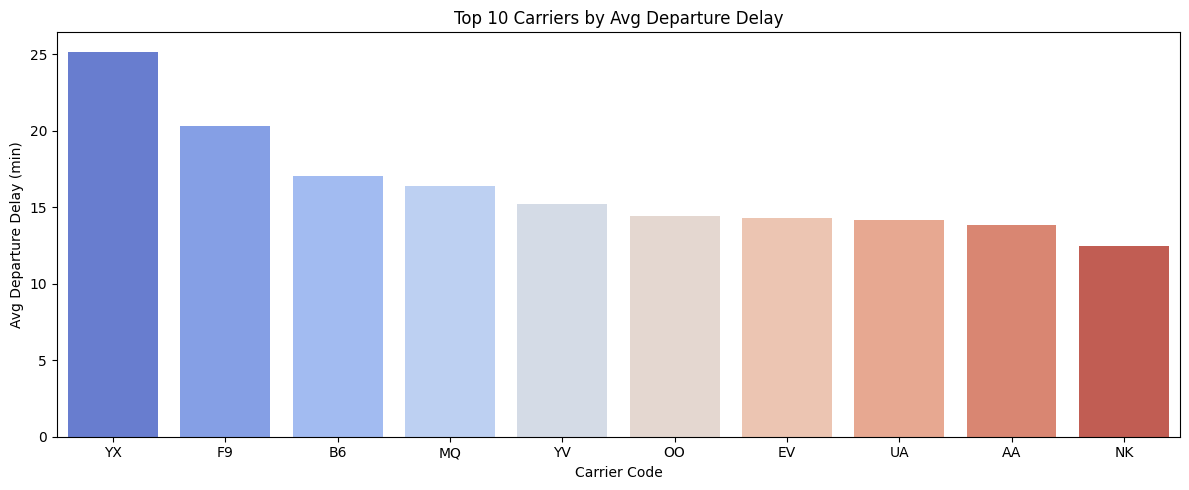

In [68]:
# Creating departure delay graph
plt.figure(figsize=(12, 5))

# Plot them in decending order
sns.barplot(x='CARRIER_CODE', y='DEP_MEAN', data=top10.sort_values('DEP_MEAN', ascending=False), palette='coolwarm')

# Cusomize the graph
plt.title('Top 10 Carriers by Avg Departure Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Avg Departure Delay (min)')
plt.tight_layout()
plt.show()


### Referencing the departure and linking it to Arrival Delay

What is really interesting to see that for the MAX and average Delay and Arrival times - they have the exact same carriers! YV, AA, and OO have the worst delay ever when it comes to both departing and arriving, and YX, B6, and F9 have the wost time in general.

Technically the worst possible outcome could be up to 22 days! Something to talk to your lawyer

# Which carrier is most prone to delays

In [69]:
# Find the delayed flights (any flight that has a delay over 15 minutes)
df['IS_DELAYED'] = df['ARR_DELAY'] > 15

# Find total delayed flights for the carriers
carrier_delay_counts = df.groupby('CARRIER_CODE')['IS_DELAYED'].agg(['sum', 'count']).reset_index()

# find avg. in percentile
carrier_delay_counts['DELAY_RATE'] = (carrier_delay_counts['sum'] / carrier_delay_counts['count']) * 100

# Renaming columns
carrier_delay_counts.columns = ['Carrier', 'Delayed Flights', 'Total Flights', 'Delay Rate (%)']

# Sorting from left to right
carrier_delay_counts = carrier_delay_counts.sort_values('Delay Rate (%)', ascending=False)

<ipython-input-70-b698fc12c9d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carrier', y='Delay Rate (%)', data=carrier_delay_counts.head(10), palette='mako')


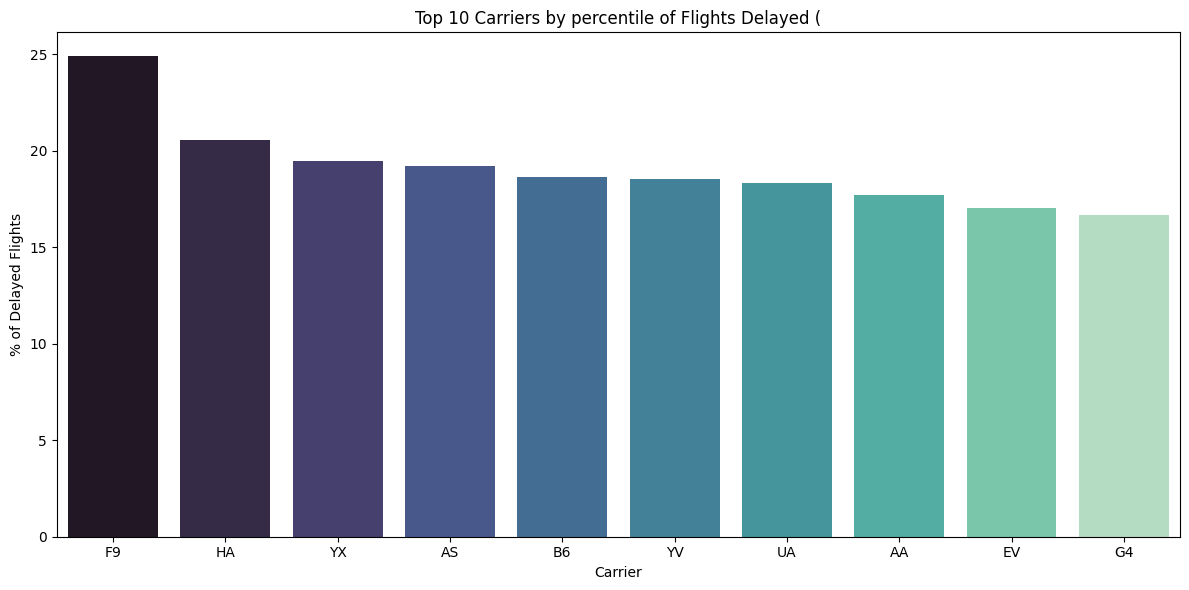

In [70]:
# Creating the bar chart
plt.figure(figsize=(12, 6))

# Showing top 10 carriers that are delayed
sns.barplot(x='Carrier', y='Delay Rate (%)', data=carrier_delay_counts.head(10), palette='mako')

# Customizing the Graph
plt.title('Top 10 Carriers by percentile of Flights Delayed (')
plt.xlabel('Carrier')
plt.ylabel('% of Delayed Flights')
plt.tight_layout()
plt.show()

This shows that out of all the carriers - F9 is omst prone to being delayed! This was calculated on the percentile of how many times it was delayed, kind of like seeing how accurate a supervised machine learning model is!

## Which region is most prone to delays

In [71]:
# Initializing delayment
df['IS_DELAYED'] = df['ARR_DELAY'] > 15

# Grouping the states and delayed flights
regional_counts = df.groupby('ORIGIN_ST')['IS_DELAYED'].sum().reset_index()
regional_counts.columns = ['State', 'Number of Delayed Flights']



<ipython-input-72-2094042ea4f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Number of Delayed Flights', data=regional_counts, palette='plasma')


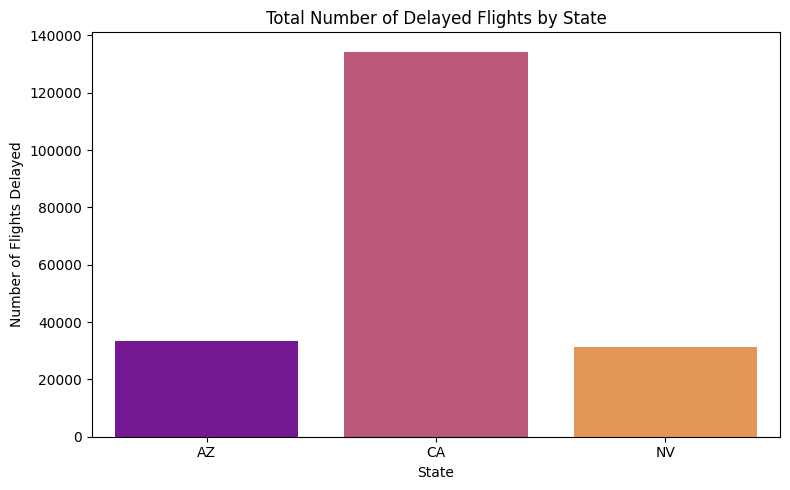

In [72]:
# Creating the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='Number of Delayed Flights', data=regional_counts, palette='plasma')

# Cusotmizing the cahrt
plt.title('Total Number of Delayed Flights by State')
plt.xlabel('State')
plt.ylabel('Number of Flights Delayed')
plt.tight_layout()
plt.show()

This was extremely interesting!

Before in the patterns we were looking for which regions might have the most delays. However this is different - this is showing us the percentile amount of delays! So while initally we thought that California had the least amount of delays - turns out they do have the most amount of delays - they just also might have the least amount of flights as well!

## Question 5

###5.1
Question: What are the top ten airlines that have the best performance in the region (AZ, NV, & CA)?

What defines "best performance" + justification: For the definition of "best performance", we are going to go with the airline that's the least amount of time for distance traveled. We decided on this definition for the "best performance" because if a flight is able to get to its destination faster for the distance traveled, it means that it is more efficient in terms of flying and gets to the desired destination faster compared to other airlines.

In [73]:
#Convert all of the time-elapsed values into hours rather than minutes
df['ELAPSED_TIME'] = df['ELAPSED_TIME'] / 60;
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].round(2)

CARRIER_CODE
MQ    434.79
HA    433.27
EV    416.60
B6    415.29
YX    415.20
DL    408.32
AA    396.19
UA    391.05
F9    386.04
NK    373.23
dtype: float64


<ipython-input-74-8790b0ec0baa>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  airline_ratios = df.groupby('CARRIER_CODE').apply(lambda x: (x['DISTANCE'] / x['ELAPSED_TIME']).mean())


Text(0, 0.5, 'Flight Hours/Distance')

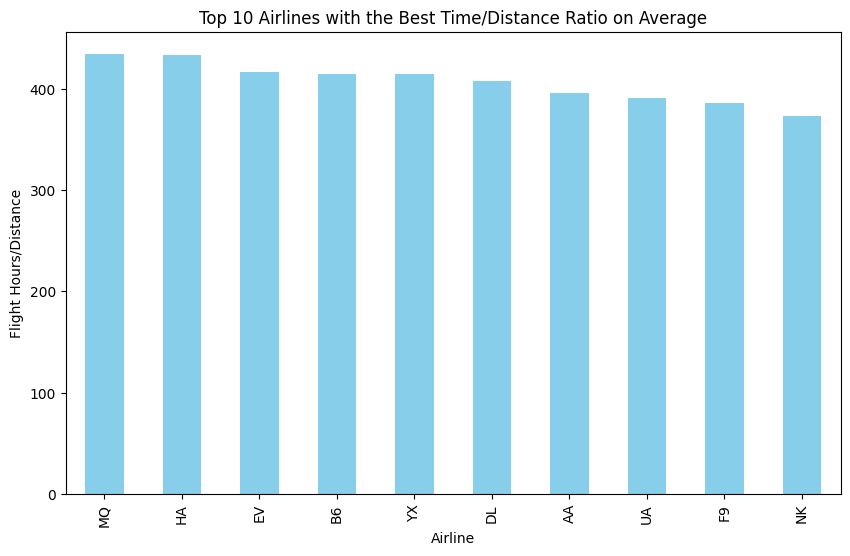

In [74]:
#Group flights of each airline together and divide the distance by the time and find the mean
airline_ratios = df.groupby('CARRIER_CODE').apply(lambda x: (x['DISTANCE'] / x['ELAPSED_TIME']).mean())
airline_ratios = airline_ratios.round(2)
airline_ratios = airline_ratios.sort_values(ascending=False)

#Look at the head of the data
print(airline_ratios.head(10))

#Plot the top 10 airlines with the best time/distance ratio on average with barchart
plt.figure(figsize=(10, 6))
airline_ratios.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Airlines with the Best Time/Distance Ratio on Average')
plt.xlabel('Airline')
plt.ylabel('Flight Hours/Distance')

Looking at the data above, we can see that Envoy Air (MQ) seems to have the best performance compared to any of the other airlines. However, there also isn't too much of a speed difference between these top ten airlines. This is pretty much basing the performance on the speed which each airline reaches their destination. Since we took the mean of each grouping of airlines, this is pretty much how fast the airlines fly on average. Now, this data really only tells us how fast they get from one place to another speed-wise. It doesn't really take into account whatever routes that each airline took, or what the weather was like during their flights. These could be factors that affect how fast or slow the plane ends up being. Furthermore, this data shows nothing about the airlines service-wise (if we were to include that in the "best performing" category), so as a customer, maybe you would want to take a slower plane that has better quality service. So, while these ten airlines have the "best performance" according to our definition of it along with the constraints of the data given, it doesn't necessarily mean that these airlines are so much better than the other airlines.

The carrier codes for each arlines can be seen here: [Carrier Codes](https://www.bts.gov/topics/airlines-and-airports/airline-codes)

###5.2

Question: What are total amount of flight hours per month for each of the "best performing" airlines? Plot and visualize this data.

We are going to use the time-elapsed column for this question, as it showcases the flight time (in minutes, but we changed it to hours from the previous part of this question) for each flight.

<Figure size 1000x600 with 0 Axes>

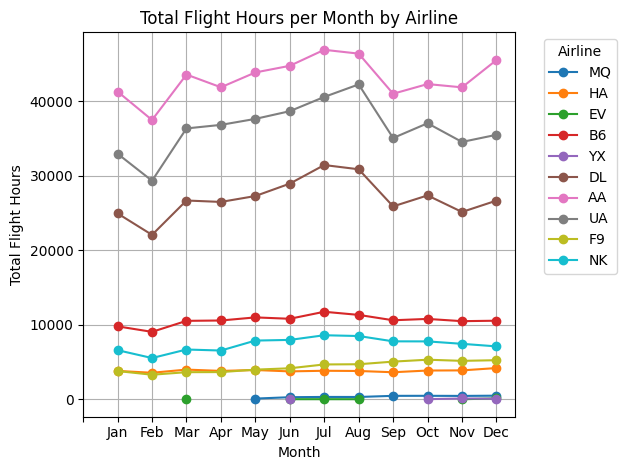

In [75]:
#Find the flight hours for each month of the best performing airlines
mq_hours = df[df['CARRIER_CODE'] == 'MQ'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

ha_hours = df[df['CARRIER_CODE'] == 'HA'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

ev_hours = df[df['CARRIER_CODE'] == 'EV'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

b6_hours = df[df['CARRIER_CODE'] == 'B6'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

yx_hours = df[df['CARRIER_CODE'] == 'YX'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

dl_hours = df[df['CARRIER_CODE'] == 'DL'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

aa_hours = df[df['CARRIER_CODE'] == 'AA'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

ua_hours = df[df['CARRIER_CODE'] == 'UA'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

f9_hours = df[df['CARRIER_CODE'] == 'F9'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

nk_hours = df[df['CARRIER_CODE'] == 'NK'].groupby(df['FL_DATE'].dt.month)['ELAPSED_TIME'].sum()

top_airlines_df = pd.DataFrame({
    'MQ': mq_hours,
    'HA': ha_hours,
    'EV': ev_hours,
    'B6': b6_hours,
    'YX': yx_hours,
    'DL': dl_hours,
    'AA': aa_hours,
    'UA': ua_hours,
    'F9': f9_hours,
    'NK': nk_hours
})

# Plot the data
plt.figure(figsize=(10, 6))
top_airlines_df.plot(kind='line', marker='o')

# Customize the plot
plt.title('Total Flight Hours per Month by Airline')
plt.xlabel('Month')
plt.ylabel('Total Flight Hours')
plt.xticks(ticks=range(13), labels=[ '', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

From this data, we can see that there seems to be quite a difference in the number of hours between airlines. For instance, airlines like American Airlines (AA) and United Airlines (UA) have a lot more flight hours compared to airlines such as Envoy Air (MQ) and Hawaiian Airlines (HA). Additionally, these airlines that have more hours are actually ranked a bit lower than the airlines that less hours in the "best performing" category. In addition to that, some airlines, such as MQ, don't even have flights in some months (Jan, Feb, etc.). What this tells us is that although we evaluated "best performance" based off of the ratio between time and distance, there may be some other factors that should be taken into account when actually trying to find the best flight, as clearly some airlines just have less flights in general compared to others. It raises the question of "would their results be any different if they had the same influx of flights compared to airlines that have a large influx of flight hours?"

The carrier codes for each airline can be seen here: [Carrier Codes](https://www.bts.gov/topics/airlines-and-airports/airline-codes)

# Question 6

Question 6 asks us to to choose three specific aircrafts using their tail numbers, then we must examine the dataset to answer the following parts 6.1, 6.2, and 6.3 for each aircraft.

When choosing THREE aircrafts to analyze we randomly chose the first three aircrafts in the data set with origins from our selected states (AZ, CA, NV)

Question 6.1: We are asked to find which airline owns or operates the aircraft chosen, and what are its most common travel routes or destinations?

In [76]:
# Question 6.1

for tail_num in ['N150NN', 'N180US', 'N928LR']:
    aircraft_data = df[df['TAIL_NUM'] == tail_num]
    carrier = aircraft_data['CARRIER_CODE'].mode()[0]

    # Group and reset index to show ORIGIN and DEST clearly
    top_routes = (
        aircraft_data
        .groupby(['ORIGIN', 'DEST'])
        .size()
        .sort_values(ascending=False)
        .head(5)
        .reset_index(name='Count')
    )

    print(f"Aircraft {tail_num} is operated by {carrier}")
    print("Top travel routes:")
    print(top_routes)

Aircraft N150NN is operated by AA
Top travel routes:
  ORIGIN DEST  Count
0    SFO  DFW     32
1    SAN  DFW     30
2    LAX  DFW     27
3    LAX  ORD     25
4    LAX  MIA     18
Aircraft N180US is operated by AA
Top travel routes:
  ORIGIN DEST  Count
0    LAX  CLT     16
1    PHX  CLT     14
2    SAN  CLT     14
3    PHX  PHL     13
4    SFO  PHX     13
Aircraft N928LR is operated by YV
Top travel routes:
  ORIGIN DEST  Count
0    PHX  TUS     29
1    PHX  ELP     28
2    TUS  PHX     28
3    PHX  MRY     24
4    MRY  PHX     24


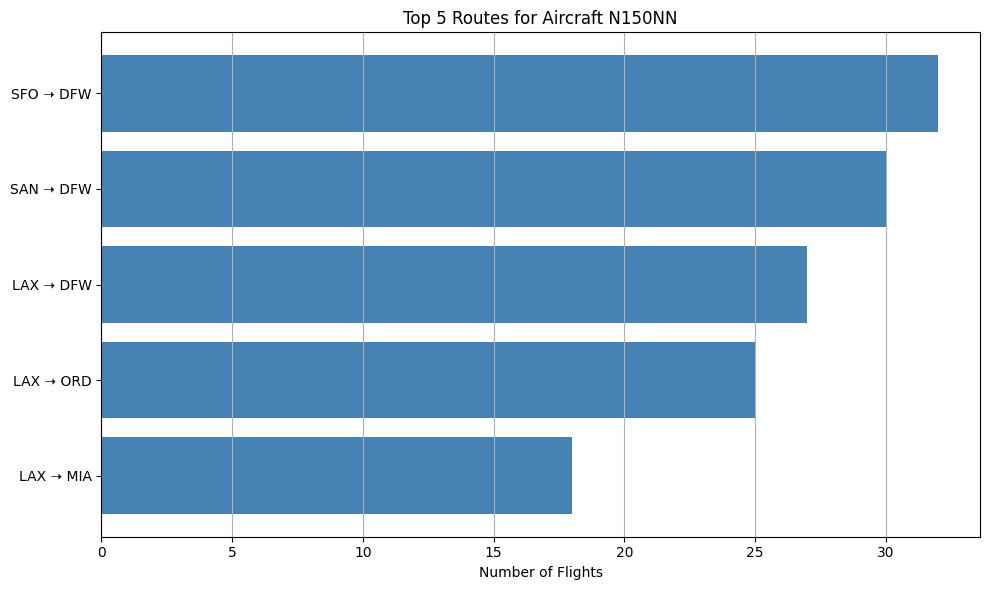

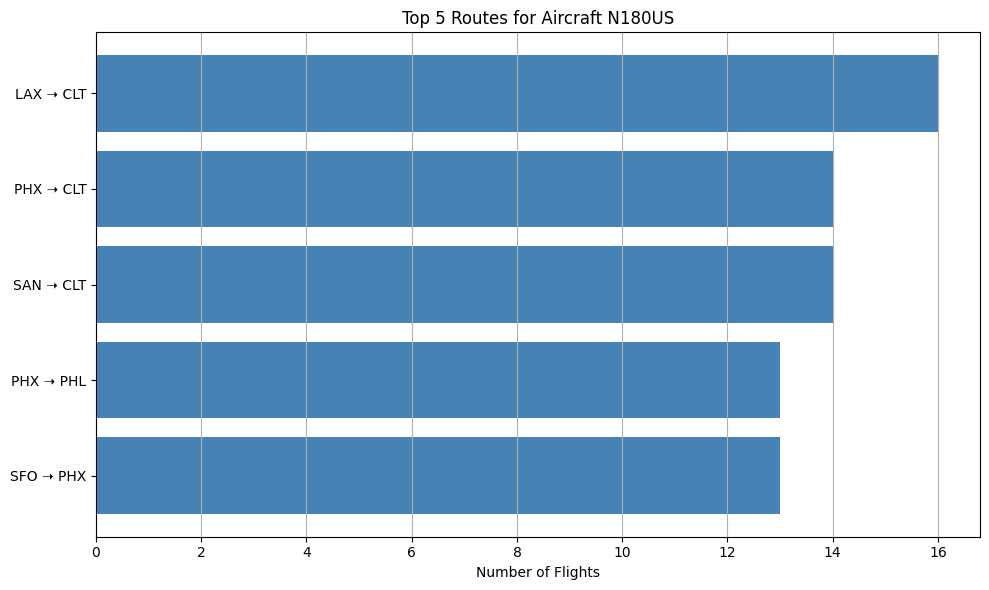

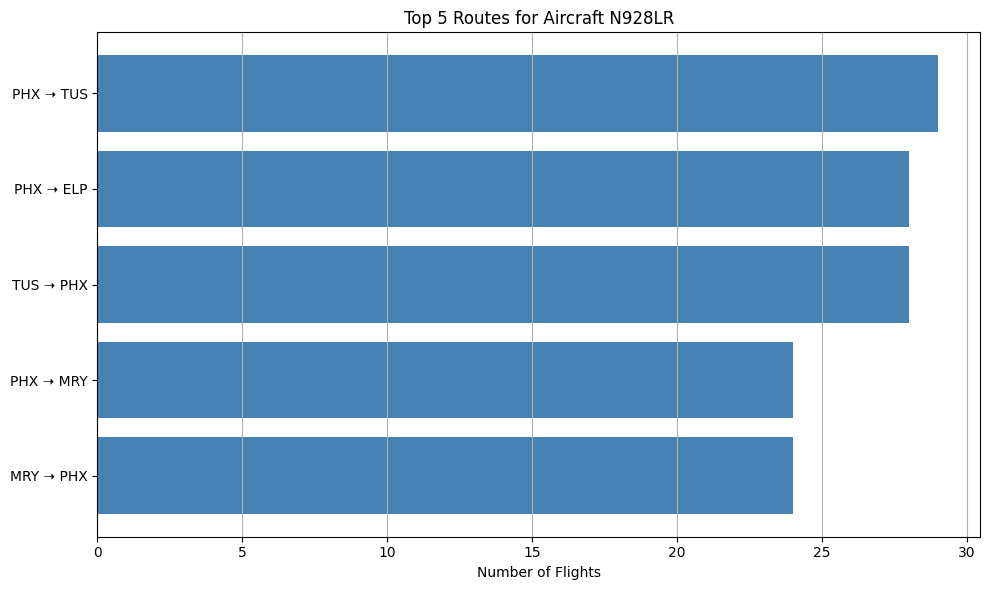

In [77]:
# Visulization for 6.1

for tail_num in ['N150NN', 'N180US', 'N928LR']:
    aircraft_data = df[df['TAIL_NUM'] == tail_num]

    top_routes = (
        aircraft_data
        .groupby(['ORIGIN', 'DEST'])
        .size()
        .sort_values(ascending=False)
        .head(5)
        .reset_index(name='Count')
    )

    # Create a route label like "DFW ➝ LAX"
    top_routes['Route'] = top_routes['ORIGIN'] + ' ➝ ' + top_routes['DEST']

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_routes['Route'], top_routes['Count'], color='steelblue')
    plt.xlabel('Number of Flights')
    plt.title(f'Top 5 Routes for Aircraft {tail_num}')
    plt.gca().invert_yaxis()  # So the highest bar is on top
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


**Findings from Question 6.1:**

We found that N150NN and N180US are operated by American Airlines (AA), while N928LR is operated by Mesa Airlines (YV), a regional carrier.

N150NN mainly flies from DFW to major hubs like LAX, SFO, and SAN, suggesting it’s used for long-distance, high-traffic routes.

N180US covers a mix of national routes, including LAX–CLT and ORD–PHX, showing a broader domestic use.

N928LR operates short regional routes centered around PHX, such as PHX–TUS and PHX–ELP.

Overall, major carriers use their aircraft for cross-country travel, while regional carriers focus on shorter trips.


Question 6.2: We are asked to find the frequency of arrival or departure delays for the chosen aircrafts? We want to break this down by the airports it travels to and from.

In [78]:
# Question 6.2

for tail_num in ['N150NN', 'N180US', 'N928LR']:
    aircraft_data = df[df['TAIL_NUM'] == tail_num]
    delay_stats = aircraft_data.groupby('ORIGIN')[['DEP_DELAY', 'ARR_DELAY']].mean()
    print(f"Delays for Aircraft {tail_num} by Airport:\n{delay_stats}")

Delays for Aircraft N150NN by Airport:
        DEP_DELAY  ARR_DELAY
ORIGIN                      
LAS     14.518519  16.962963
LAX     17.293103  15.258621
PHX     14.666667  16.095238
SAN     19.968750  19.281250
SFO      7.462963   8.185185
SMF     11.750000   3.000000
Delays for Aircraft N180US by Airport:
        DEP_DELAY  ARR_DELAY
ORIGIN                      
LAS     21.675676  21.513514
LAX     12.319149  11.446809
ONT      0.000000   0.000000
PHX     15.389831  13.601695
PSP      5.000000   0.000000
SAN      3.040000   3.720000
SFO     27.081081  27.729730
SJC      0.000000   0.000000
SMF      8.285714  10.142857
Delays for Aircraft N928LR by Airport:
        DEP_DELAY  ARR_DELAY
ORIGIN                      
BFL     22.800000  20.000000
BUR      1.705882   1.705882
FAT     16.000000  12.000000
LGB     77.222222  76.666667
MRY      8.750000  13.583333
OAK     28.000000  26.500000
ONT     13.588235  14.058824
PHX     11.720779  11.717532
PSP      4.214286   4.714286
RNO      7.50

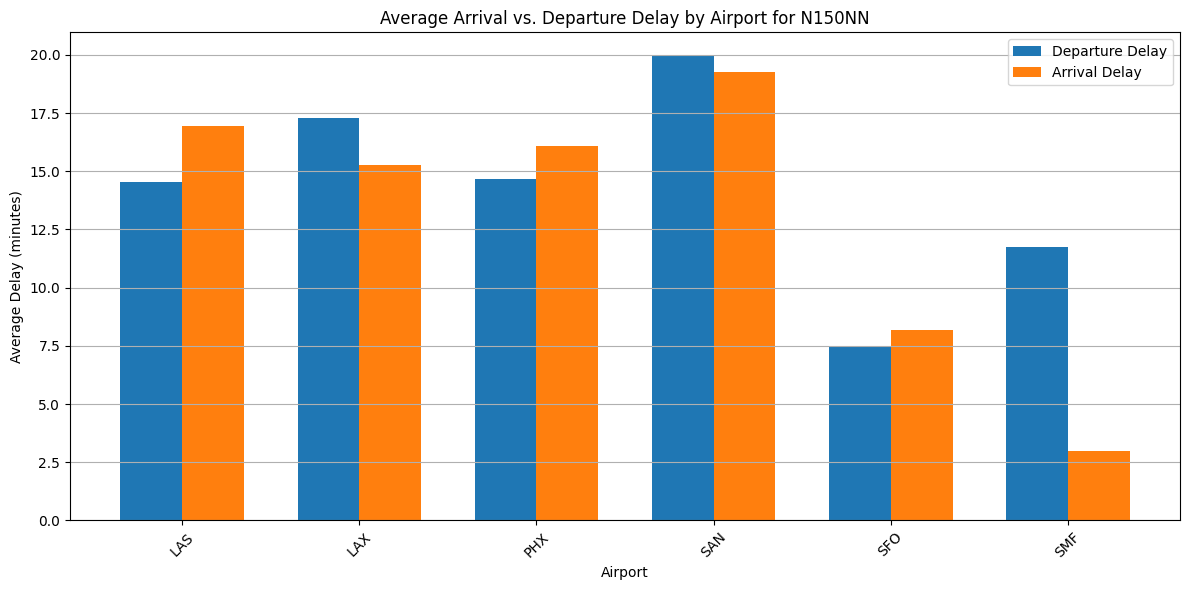

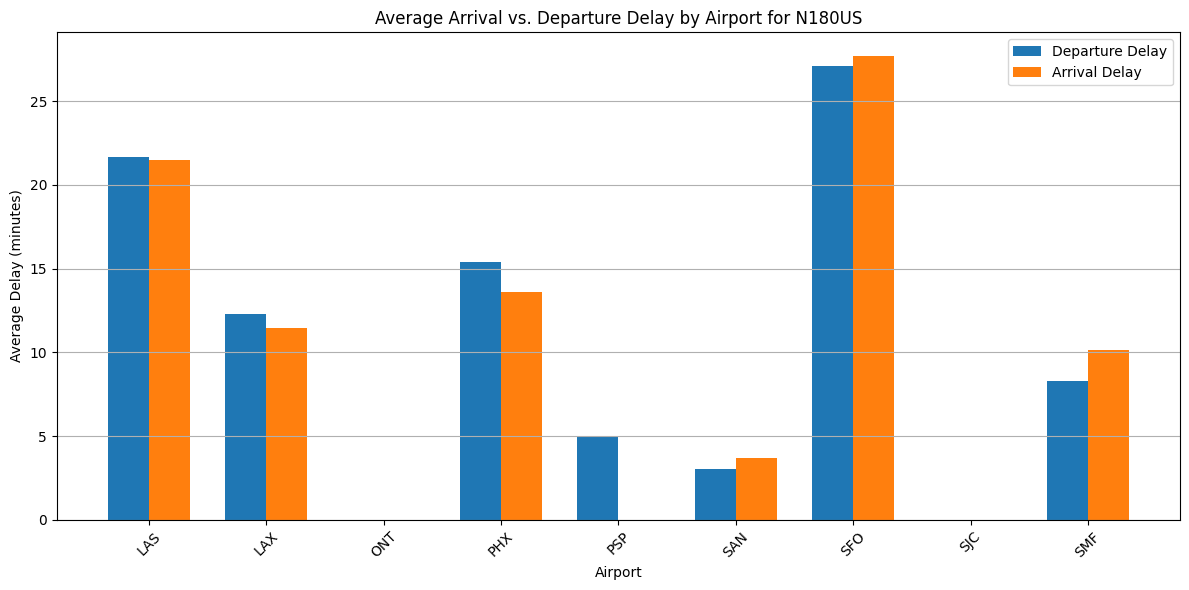

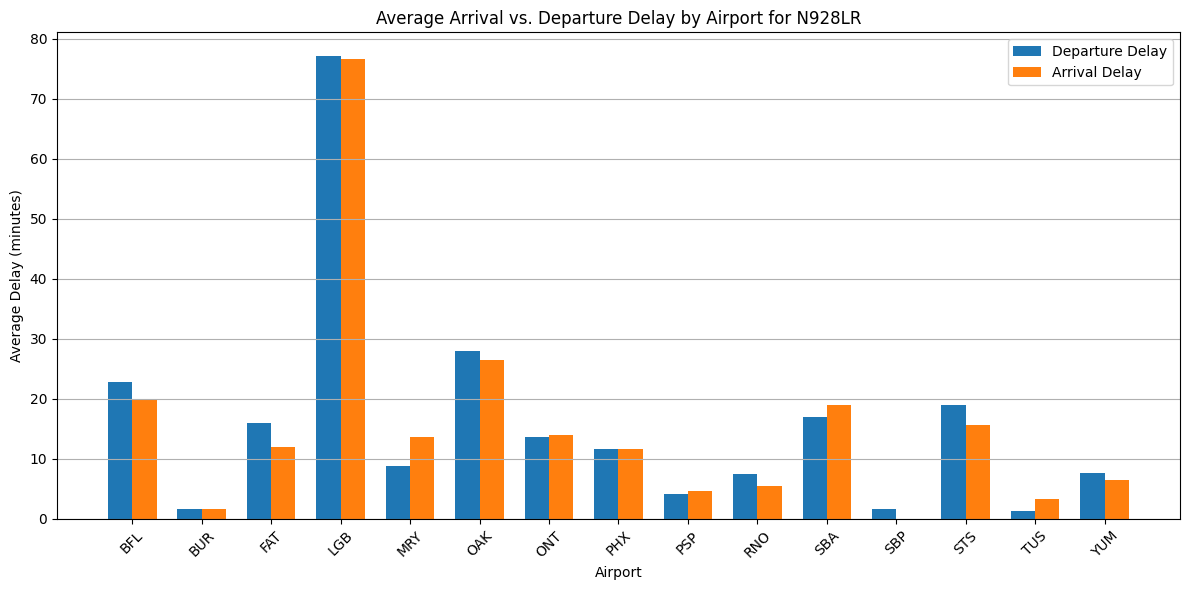

In [79]:
# Visulization for 6.2

for tail_num in ['N150NN', 'N180US', 'N928LR']:
    aircraft_data = df[df['TAIL_NUM'] == tail_num]
    delay_stats = aircraft_data.groupby('ORIGIN')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()

    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = range(len(delay_stats))

    plt.bar(index, delay_stats['DEP_DELAY'], bar_width, label='Departure Delay')
    plt.bar([i + bar_width for i in index], delay_stats['ARR_DELAY'], bar_width, label='Arrival Delay')

    plt.xlabel('Airport')
    plt.ylabel('Average Delay (minutes)')
    plt.title(f'Average Arrival vs. Departure Delay by Airport for {tail_num}')
    plt.xticks([i + bar_width / 2 for i in index], delay_stats['ORIGIN'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


<ipython-input-80-373bcfd20a85>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_range = pd.date_range(start=df['FL_DATE'].min(), end=df['FL_DATE'].max(), freq='M')
<ipython-input-80-373bcfd20a85>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='FL_DATE', freq='M'))[['DEP_DELAY', 'ARR_DELAY']]


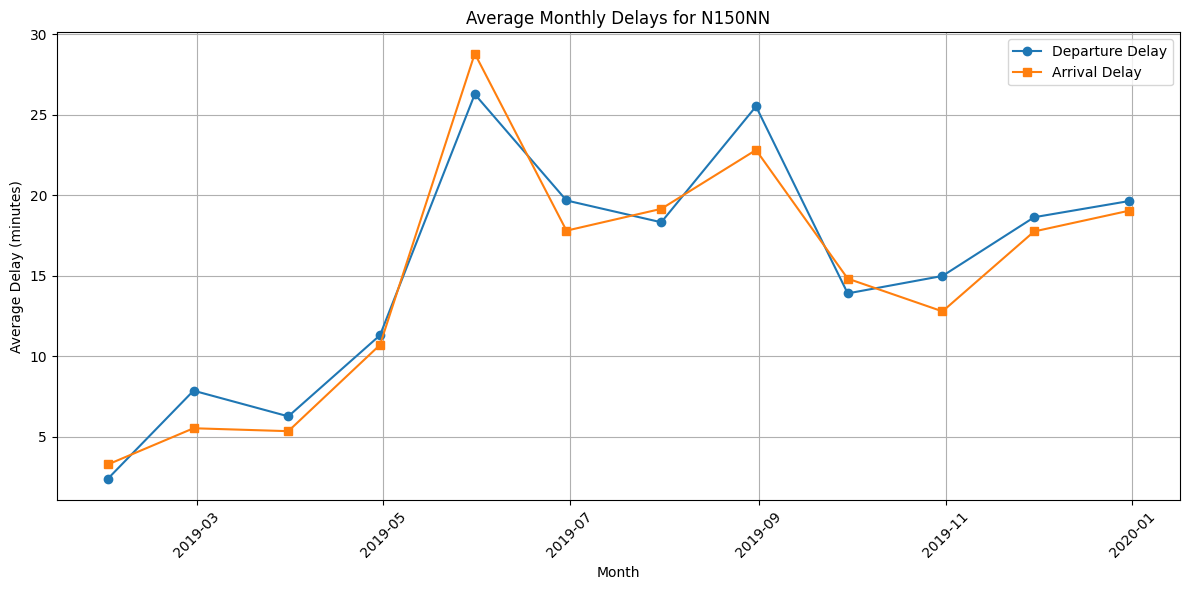

<ipython-input-80-373bcfd20a85>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='FL_DATE', freq='M'))[['DEP_DELAY', 'ARR_DELAY']]


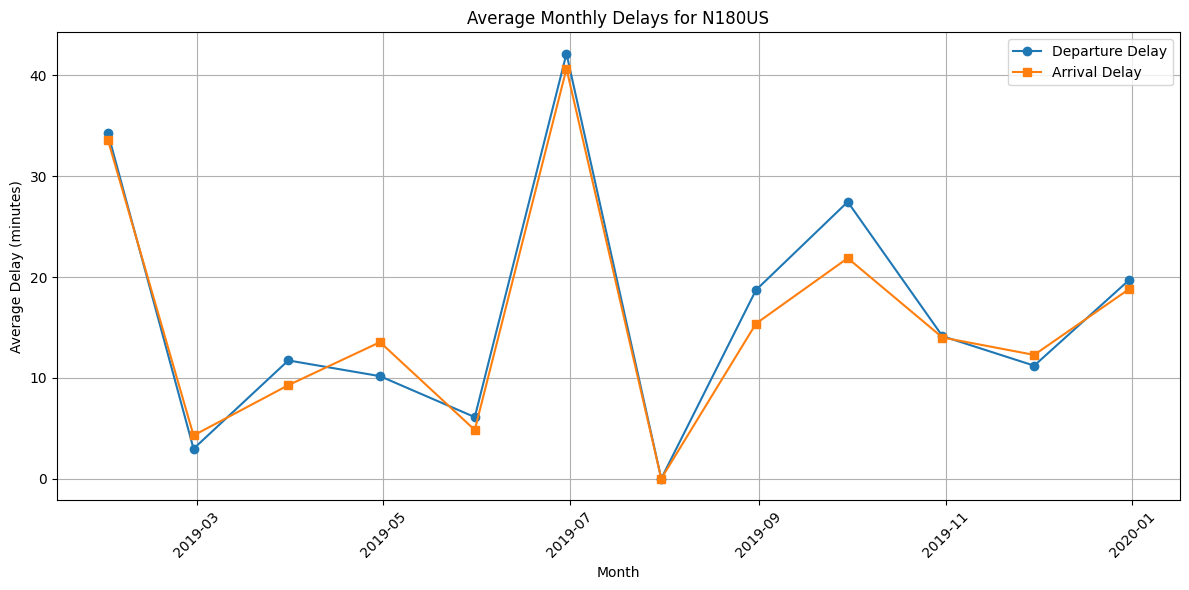

<ipython-input-80-373bcfd20a85>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='FL_DATE', freq='M'))[['DEP_DELAY', 'ARR_DELAY']]


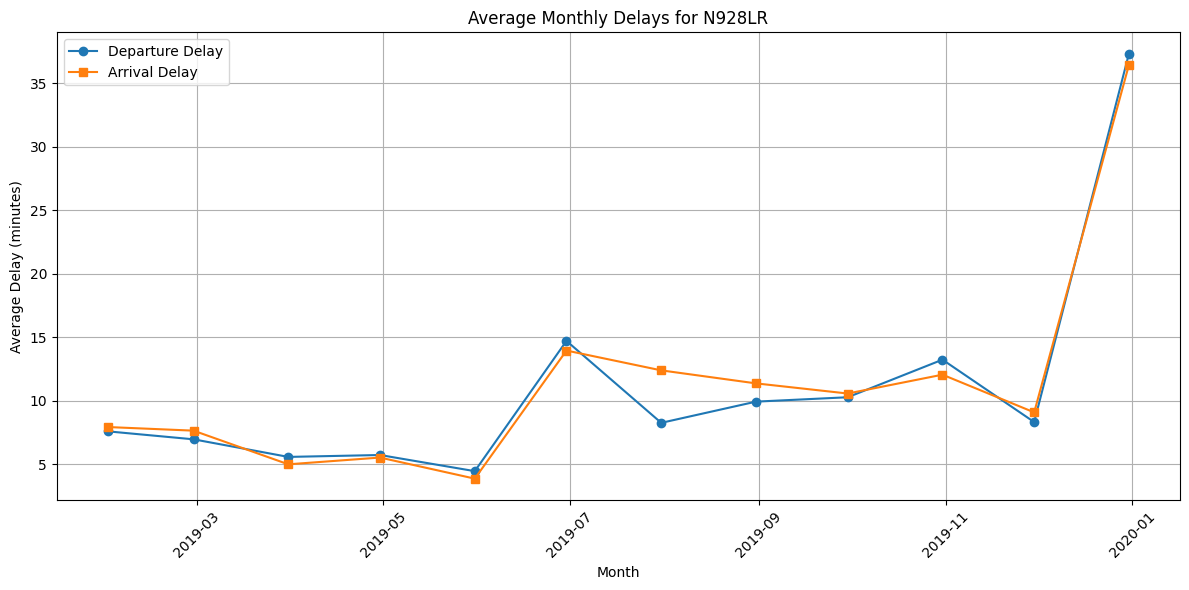

In [80]:
# Create a full monthly date range
full_range = pd.date_range(start=df['FL_DATE'].min(), end=df['FL_DATE'].max(), freq='M')

for tail_num in ['N150NN', 'N180US', 'N928LR']:
    aircraft_data = df[df['TAIL_NUM'] == tail_num]

    monthly_delay = (
        aircraft_data
        .groupby(pd.Grouper(key='FL_DATE', freq='M'))[['DEP_DELAY', 'ARR_DELAY']]
        .mean()
        .reindex(full_range)
        .reset_index()
        .rename(columns={'index': 'FL_DATE'})
    )
 # Fill missing with 0s or NaNs as desired
    monthly_delay.fillna(0, inplace=True)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_delay['FL_DATE'], monthly_delay['DEP_DELAY'], marker='o', label='Departure Delay')
    plt.plot(monthly_delay['FL_DATE'], monthly_delay['ARR_DELAY'], marker='s', label='Arrival Delay')

    plt.title(f'Average Monthly Delays for {tail_num}')
    plt.xlabel('Month')
    plt.ylabel('Average Delay (minutes)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Findings for Question 6.2:**

We looked at the average departure and arrival delays for each aircraft across the airports they operated from.

Delays varied significantly by location, with some airports consistently showing higher delays for both departure and arrival.

For example, SFO and LAS showed higher average delays for both N150NN and N180US. This could be due to potential congestion or operational inefficiencies at those hubs.

N928LR had lower delays overall, likely due to its shorter trips, regional routes and smaller airports.

**Grouped Bar Plots:**

Made it easy to compare departure vs arrival delay side-by-side for each airport per aircraft.

Showed clear patterns of certain airports having consistently longer delays like SFO.

**Line Plots (Over Time):**

Showed how delays fluctuated monthly for each aircraft.

Qeustion 6.3: We are asked to provide summary statistics like average, median, min, and max for the distances the aircraft has flown. As well as to look at the results from the three steps above, to find any noticeable trends or patterns across the aircrafts. We are asled to summarize our findings clearly and include visualizations for all parts of the analysis.

In [81]:
# Question 6.3
for tail_num in ['N150NN', 'N180US', 'N928LR']:
    aircraft_data = df[df['TAIL_NUM'] == tail_num]
    distance_stats = aircraft_data['DISTANCE'].describe().round(2)
    print(f"Distance statistics for {tail_num}:\n{distance_stats}")

Distance statistics for N150NN:
count     254.00
mean     1405.78
std       704.24
min       236.00
25%      1055.00
50%      1242.00
75%      1744.00
max      2611.00
Name: DISTANCE, dtype: float64
Distance statistics for N180US:
count     274.00
mean     1375.21
std       753.39
min       236.00
25%       651.00
50%      1440.00
75%      2077.00
max      2585.00
Name: DISTANCE, dtype: float64
Distance statistics for N928LR:
count     499.00
mean      460.37
std       264.84
min       110.00
25%       325.00
50%       369.00
75%       598.00
max      1396.00
Name: DISTANCE, dtype: float64


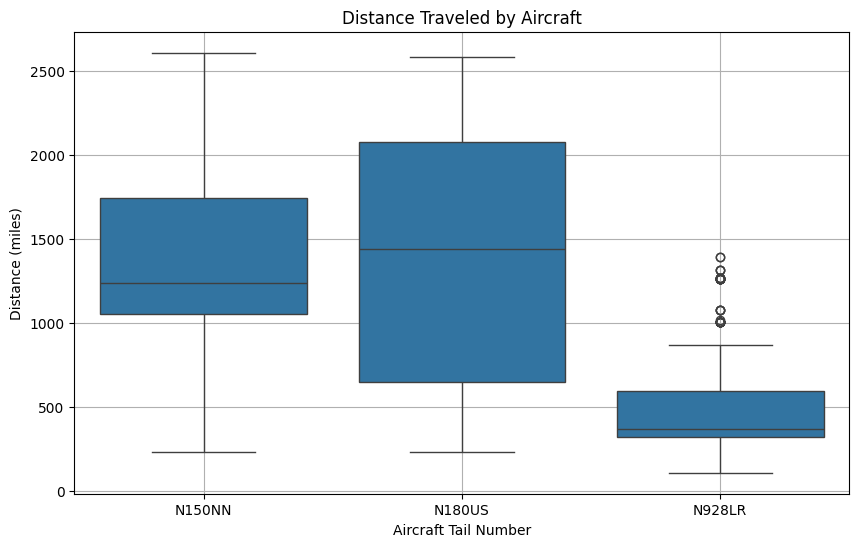

In [82]:
# Visulization for 6.3

selected_tail_nums = ['N150NN', 'N180US', 'N928LR']
filtered_df = df[df['TAIL_NUM'].isin(selected_tail_nums)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='TAIL_NUM', y='DISTANCE', data=filtered_df)
plt.title('Distance Traveled by Aircraft')
plt.xlabel('Aircraft Tail Number')
plt.ylabel('Distance (miles)')
plt.grid(True)
plt.show()


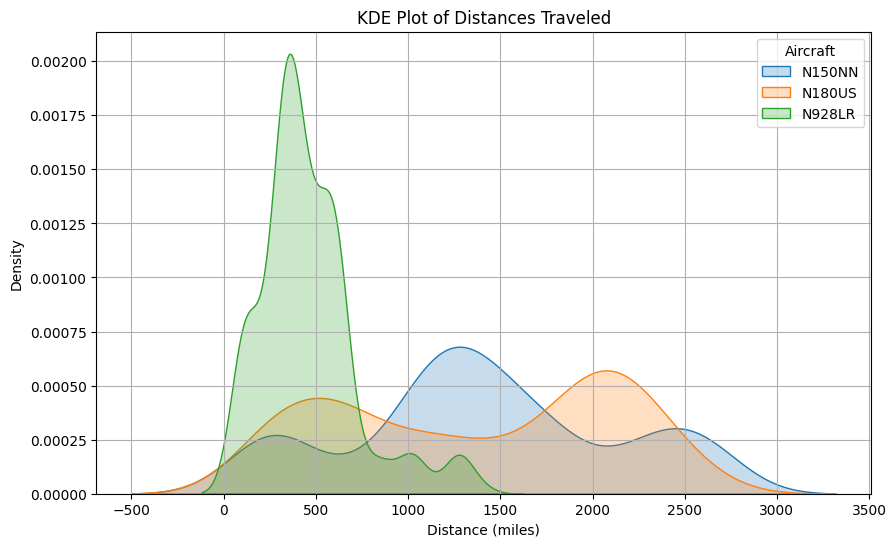

In [83]:
# Visulization for 6.3

plt.figure(figsize=(10, 6))
for tail in selected_tail_nums:
    sns.kdeplot(df[df['TAIL_NUM'] == tail]['DISTANCE'], label=tail, fill=True)

plt.title('KDE Plot of Distances Traveled')
plt.xlabel('Distance (miles)')
plt.ylabel('Density')
plt.legend(title='Aircraft')
plt.grid(True)
plt.show()

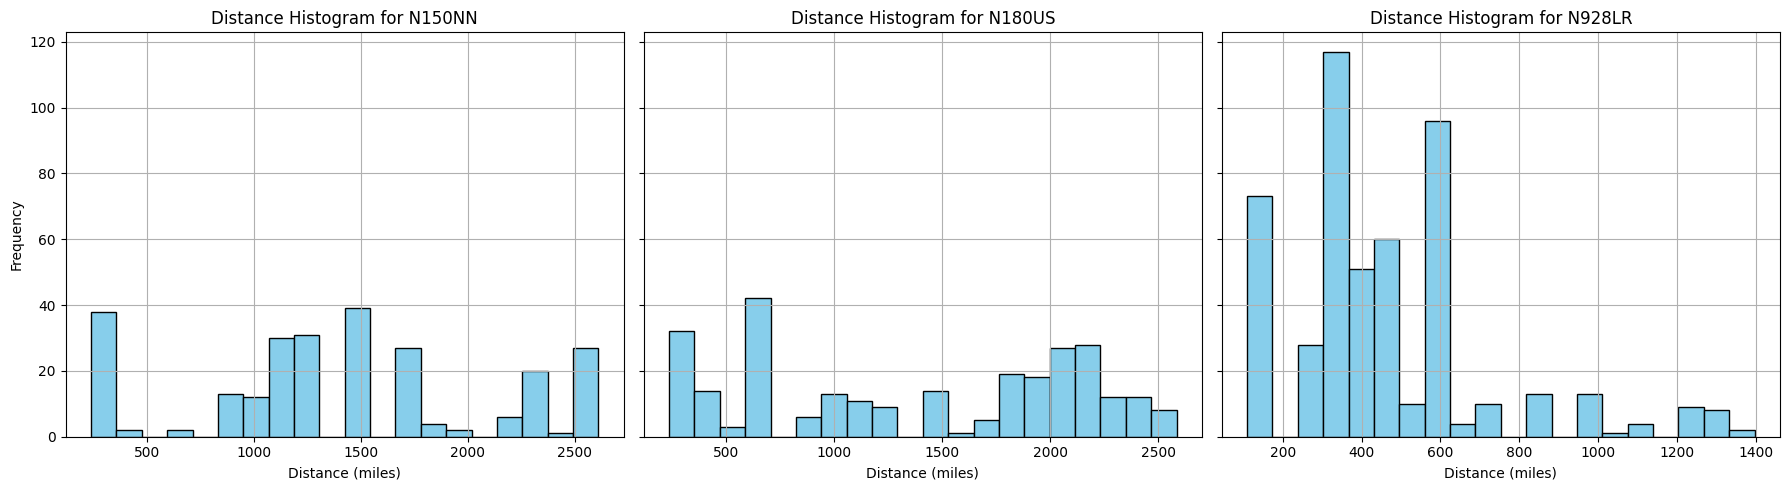

In [84]:
# Visulization for 6.3

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, tail in enumerate(selected_tail_nums):
    subset = df[df['TAIL_NUM'] == tail]['DISTANCE']
    axes[i].hist(subset, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distance Histogram for {tail}')
    axes[i].set_xlabel('Distance (miles)')
    axes[i].grid(True)

axes[0].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Findings for Question 6.3:**

We analyzed the distribution of flight distances for aircraft N150NN, N180US, and N928LR.

N150NN and N180US flew mostly longer routes (averaging around 1500 miles), while N928LR focused on short regional flights (averaging around 500 miles).

This confirmed that the first two aircraft support national coverage, while N928LR is used for regional service.

**Box Plots:**

Clearly showed median, quartiles, and outliers for each aircraft.

Highlighted how N928LR had a much narrower range of distances compared to the others.

**KDE Plots:**

Smoothed curves showed the distribution shape of distances.

N150NN and N180US had wide, bell-shaped curves, while N928LR was tightly skewed toward short distances.

**Histograms:**

Displayed exact frequency of distance ranges.

Reinforced that N928LR operates almost entirely within the short-haul range, unlike the other two.

# Question 7


* CA had overall had highest air traffic and number of outbound flights
  * Had broader set of destination airports compared to Arizona and Nevada

* MQ showed highest flight efficiency and time-to-distance ratio among all carriers
  * Had fewer total flight hours than larger airlines

* Individual carriers have distinct patterns
  * American Airlines aircraft flying long-haul national routes
  * YV operate short, repetitive flights, particularly out of Phoenix.


